In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.7 MB/s 
     |████████████████████████████████| 1.1 MB 19.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=ba25aff628691be94a4624559c34e382fd3155bf25e2e76ca6ca7abfff7a69bb
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=58fe18667b5d5fcd2da8073f06c51b5ca6d687ba537847836c4ec1f12776d195
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline

#PCA
from sklearn.decomposition import PCA
#UMAP
import umap
# pip install umap-learn
from sklearn.preprocessing import StandardScaler


In [ ]:
cd drive/MyDrive/UMAP

/content/drive/MyDrive/UMAP


In [ ]:
df = pd.read_csv("ALL_sparsematrix_bef_overall.tsv", sep='\t')
df = df.sort_values(by=['cancer'])
df.head()

,donor_id,DDX11L1,WASH7P,WASH7P.1,FAM138A,OR4F5,RP11-34P13.14,DQ597235,DQ599768,LOC100133331,...,BC107568,ADAMTSL2.1,FLJ44838,MGC70870,KIR3DL3.1,KIR2DL2,KIR2DL5B,KIR3DL2.1,total_read,cancer
1095,DO575,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,378,Bladder
1116,DO689,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,277,Bladder
1115,DO522,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1437,Bladder
1114,DO639,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1525,Bladder
1113,DO822,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,340,Bladder


In [ ]:
cancer_list = df['cancer']
total_read_list = df['total_read']
df_select = df.drop(['total_read', 'cancer'], axis=1)
df_select = df_select.set_index('donor_id')
df_cancer = df.drop(['total_read'], axis=1)
df_cancer = df_cancer.set_index('donor_id')

y_names = df_cancer.loc[:,'cancer'].values
#Standardize the Data
labels = {'Bladder': 1,
          'Blood': 2,
          'Bone': 3,
          'Brain': 4,
          'Breast': 5,
          'Cervix': 6,
          'Colorectal': 7,
          'Gall Bladder': 8,
          'Head and neck': 9,
          'Kidney': 10,
          'Liver' : 11,
          'Mesenchymal': 12,
          'Nervous system': 13,
          'Ovary': 14,
          'Stomach': 15,
          'Uterus': 16}
# df_cancer["cancer"] = df_cancer["cancer"].map(labels)

y = df_cancer.loc[:,'cancer'].values
x = df_cancer.iloc[:,:-1].values
# PCA is effected by scale so you need to scale the features in your data before applying PCA
scaled_df = StandardScaler().fit_transform(x)

In [ ]:
# PCA
# define PCA model to use
pca = PCA()

#fit PCA model to data
pca_fit = pca.fit(scaled_df)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
pca_fit


[9.74247759e-02 5.09586071e-02 3.24634402e-02 ... 1.87285950e-35
 7.08962194e-36 5.17482822e-37]
[2.88188918e+03 2.08425735e+03 1.66356525e+03 ... 3.99572110e-14
 2.45840883e-14 6.64187254e-15]


PCA()

In [ ]:
pca = PCA()

#fit PCA model to data
principal_components  = pca.fit_transform(scaled_df)
principal_components_df = pd.DataFrame(principal_components)
principal_components_df.to_csv('./results/principal_components2.0.tsv', sep='\t', encoding='utf-8')

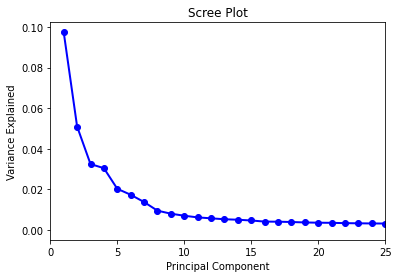

[9.74247759e-02 5.09586071e-02 3.24634402e-02 ... 1.87285950e-35
 7.08962194e-36 5.17482822e-37]


In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xlim(0, 25)
plt.show()
print(pca.explained_variance_ratio_)

In [ ]:
# cov2 = (x - x.mean(axis=1)[:, None]) @ (x.T / len(x))
# vals, vecs = np.linalg.eigh(cov2)
# scores = x.T @ cov2[:, -1:-11:-1]

# plt.scatter(*scores[:, :2].T)
# plt.show()
# PC_values = np.arange(pca.n_components_) + 1
# plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Variance Explained')
# plt.xlim(0, 50)
# plt.show()
# print(pca.explained_variance_ratio_)

In [ ]:
def pca_self(x):
  tmp = x[:, x.max(axis=0) != 0]
  cov = (tmp - tmp.mean(axis=0)) @ (tmp.T / tmp.shape[1])
  vals, vecs = np.linalg.eigh(cov)
  vecs100 = tmp.T @ vecs[:, -100:]
  vecs100 = vecs100[:, ::-1]
  vecs100 /= (vecs100 ** 2).sum(axis=0) ** 0.5
  scores = tmp @ vecs100

  plt.scatter(*scores[:, :2].T)
  plt.show()

  plt.hist(scores[:, 0], bins=10000)
  plt.xlim(-1, 5)
  plt.show()

  cov2 = (x - x.mean(axis=1)[:, None]) @ (x.T / len(x))
  vals, vecs = np.linalg.eigh(cov2)
  return vals, vecs


In [ ]:
def cancer_places(y_names):
  type_cancer = ''
  cancer_names = []
  cancer_index = []
  print(len(y_names))
  for index, i in enumerate(y_names):
    if type_cancer != i:
      type_cancer = i
      cancer_names.append(type_cancer)
      cancer_index.append(index)

  print(cancer_names)
  print(cancer_index)
  return cancer_names, cancer_index


In [ ]:
def plot_pc1(vecs, cancer_index):
  plt.figure(figsize=(20, 10))
  plt.plot(np.arange(len(vecs)), vecs[:,-1], color='blue')
  plt.ylim(-1, 1)
  # plt.xlim(2000, 3000)
  for i in cancer_index:
    plt.axvline(x=i)
  plt.show()


In [ ]:
def plot_pc_vecs(vecs, cancer_index):
  for i in range(1, 26):
    plt.figure(figsize=(20, 5))
    plt.plot(np.arange(len(vecs)), vecs[:,-i], color='blue')
    plt.ylim(-1, 1)
    for j in cancer_index:
      plt.axvline(x=j)
    # plt.xlim(1000, 2000)
    plt.title(f"PC: {i}")
    plt.show()


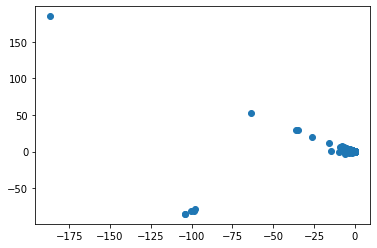

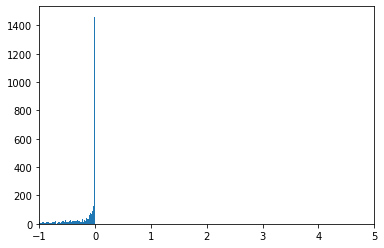

2996
['Bladder', 'Blood', 'Bone', 'Brain', 'Breast', 'Cervix', 'Colorectal', 'Gall Bladder', 'Head and neck', 'Kidney', 'Liver', 'Mesenchymal', 'Nervous system', 'Ovary', 'Stomach', 'Uterus']
[0, 23, 568, 730, 789, 1566, 1586, 1676, 1747, 1864, 2182, 2691, 2725, 2753, 2888, 2925]


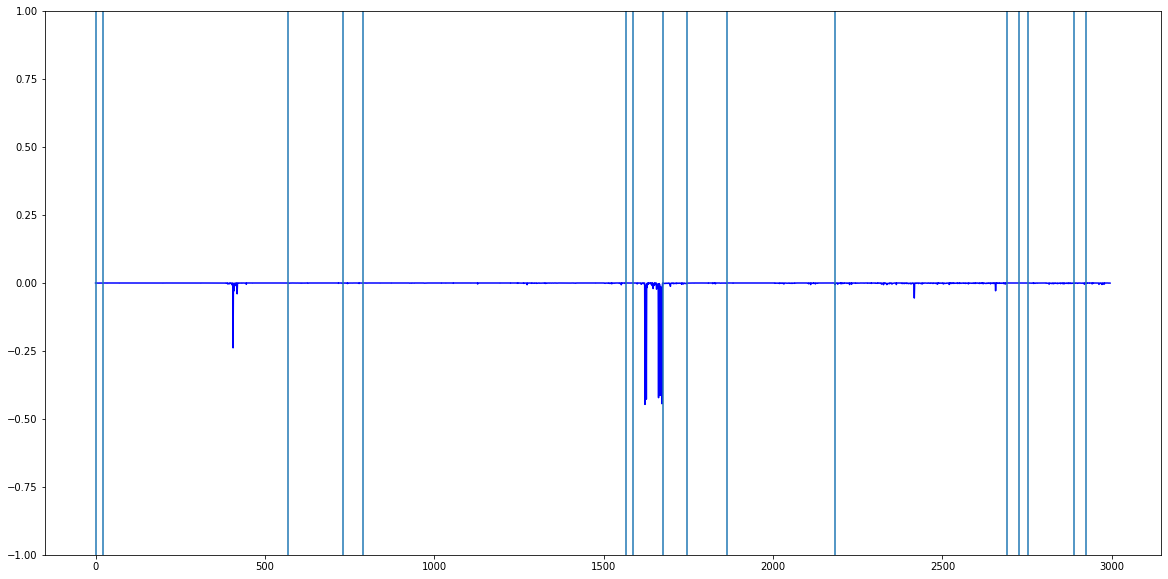

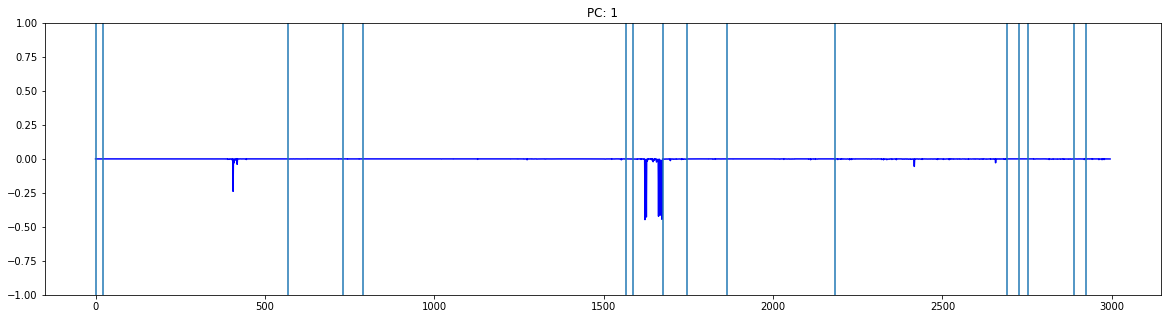

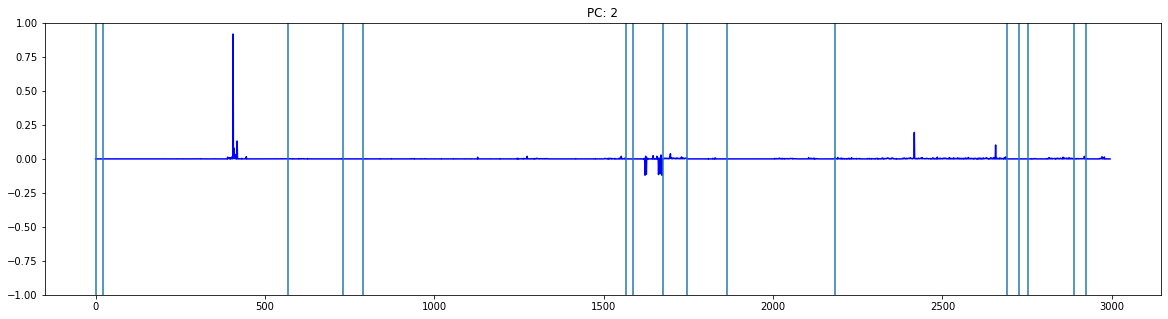

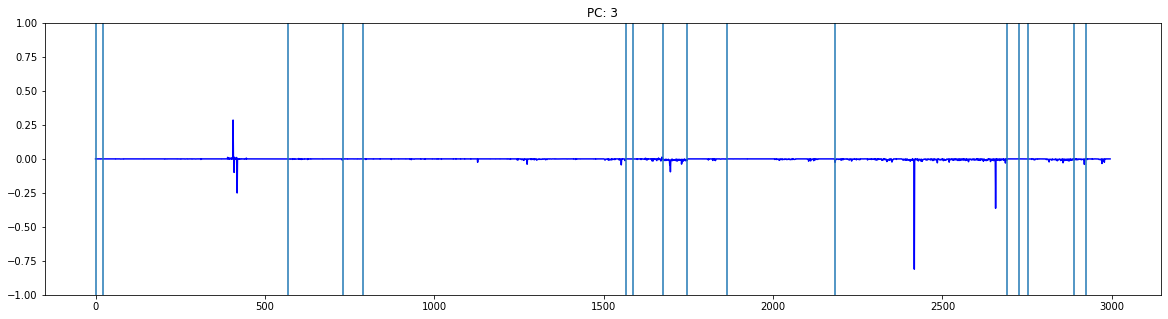

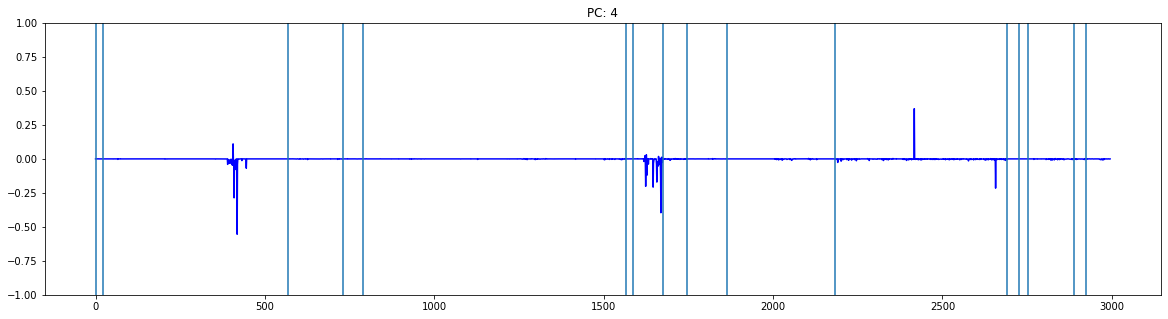

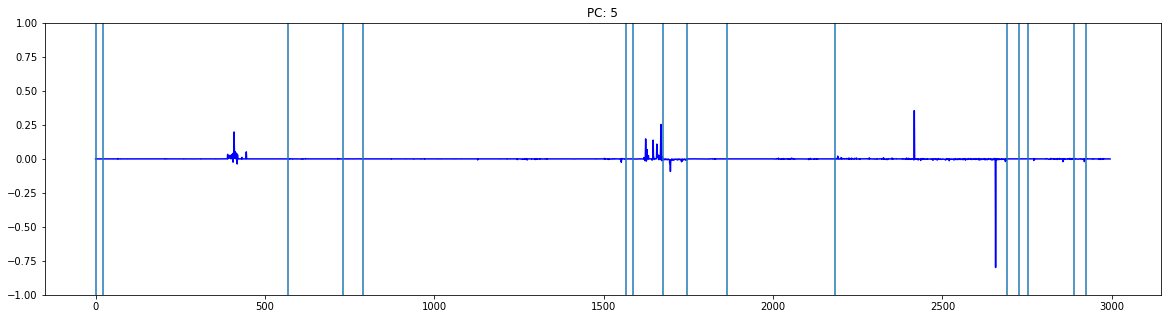

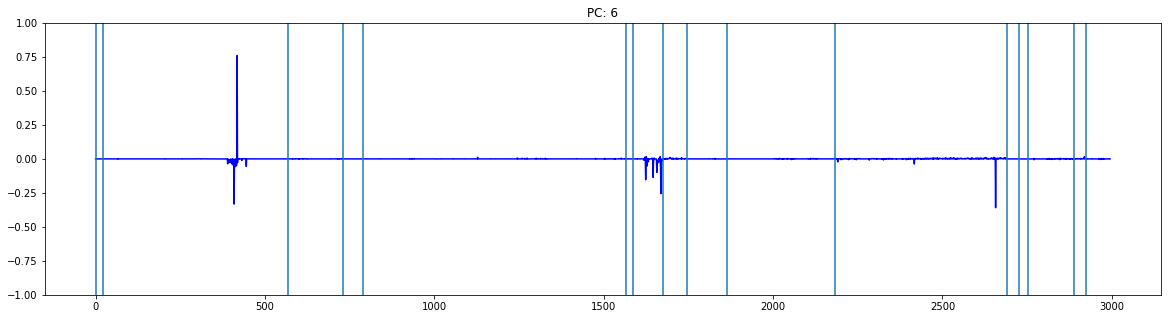

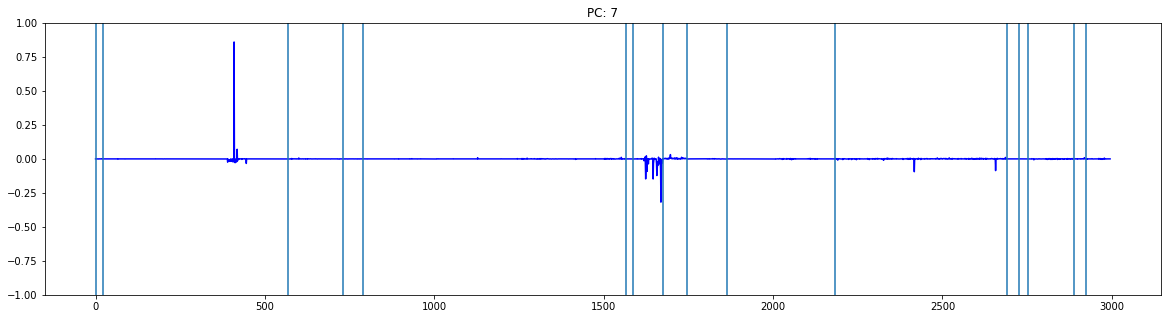

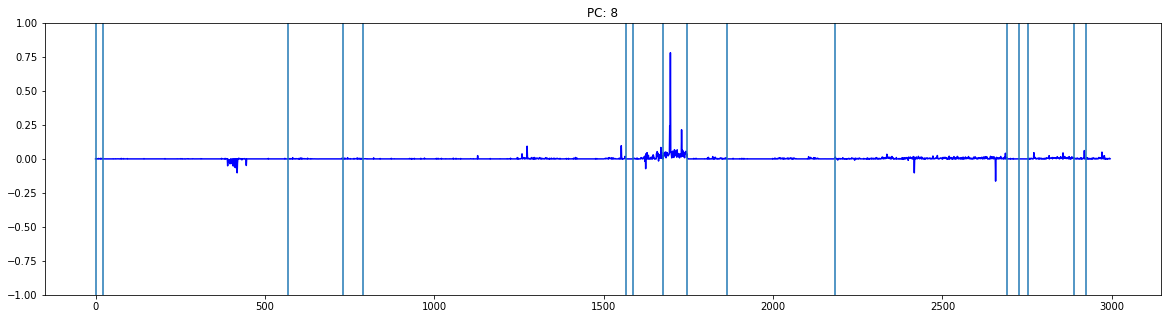

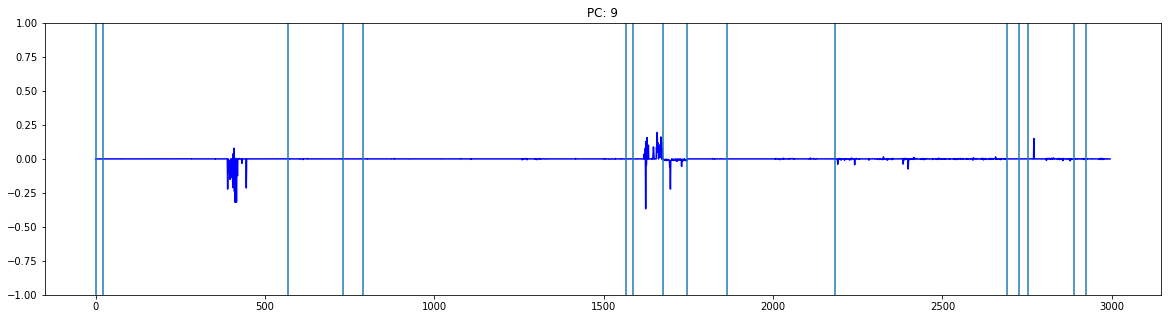

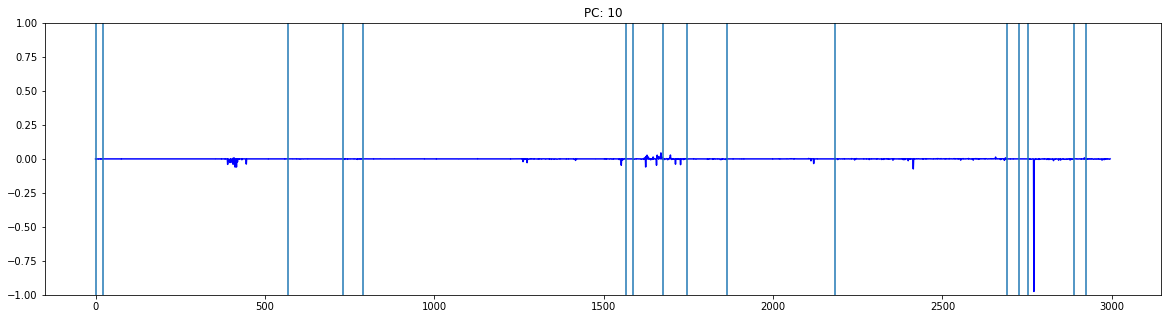

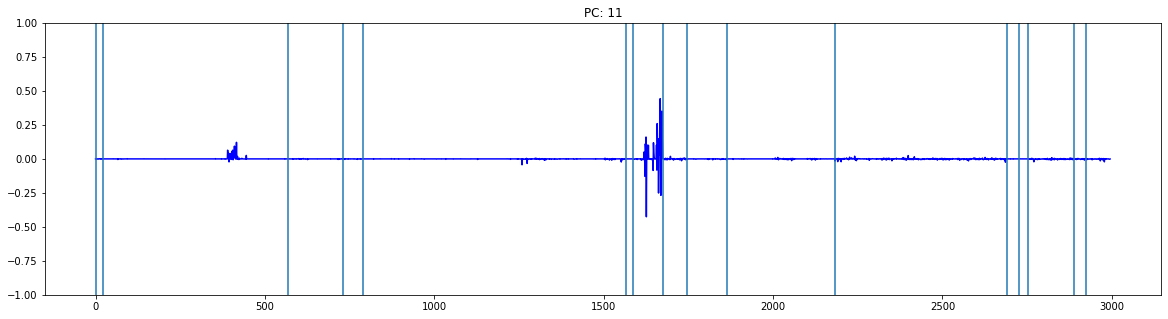

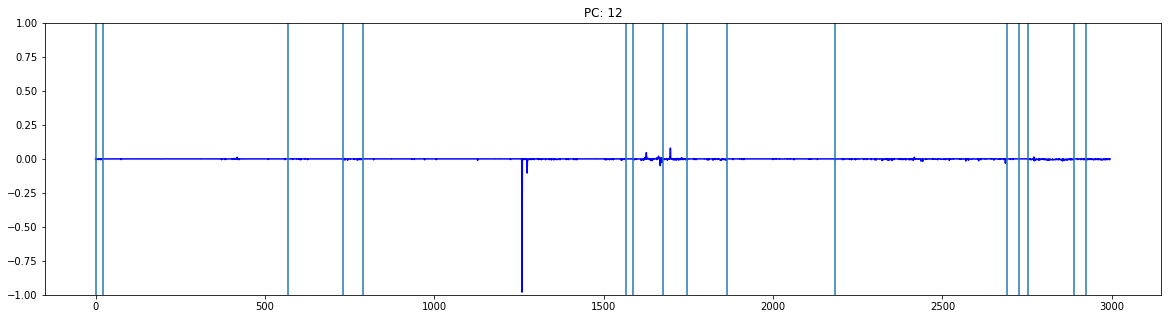

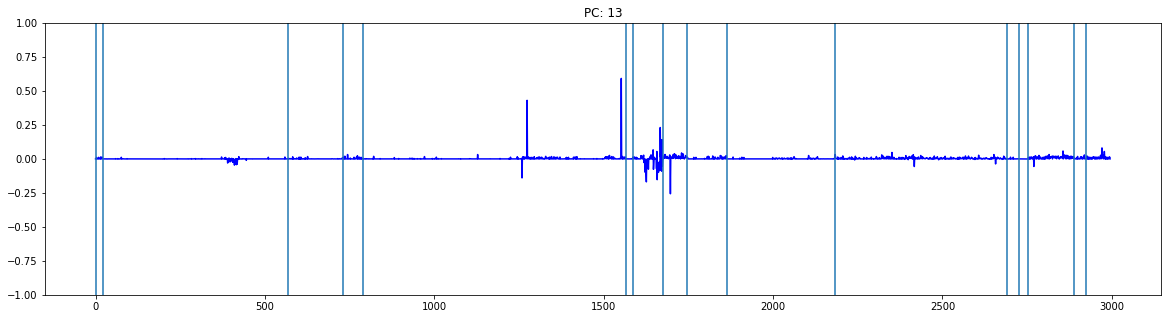

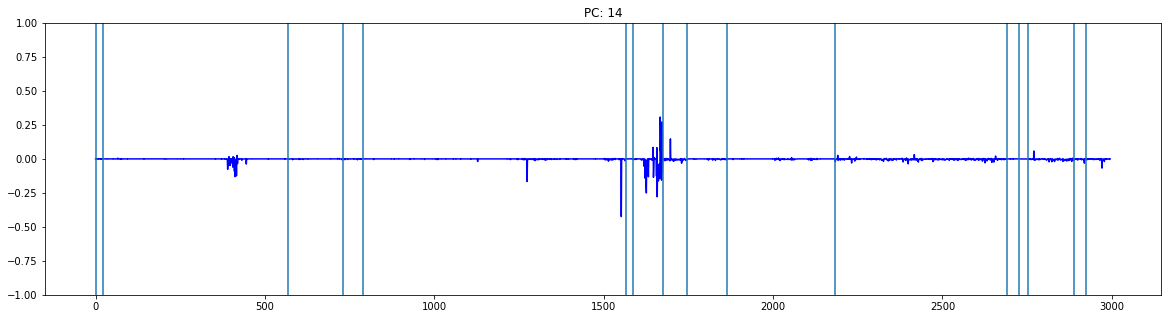

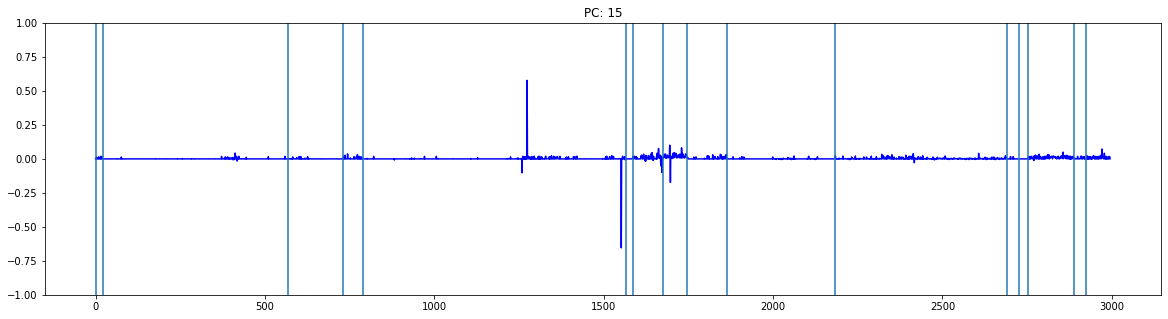

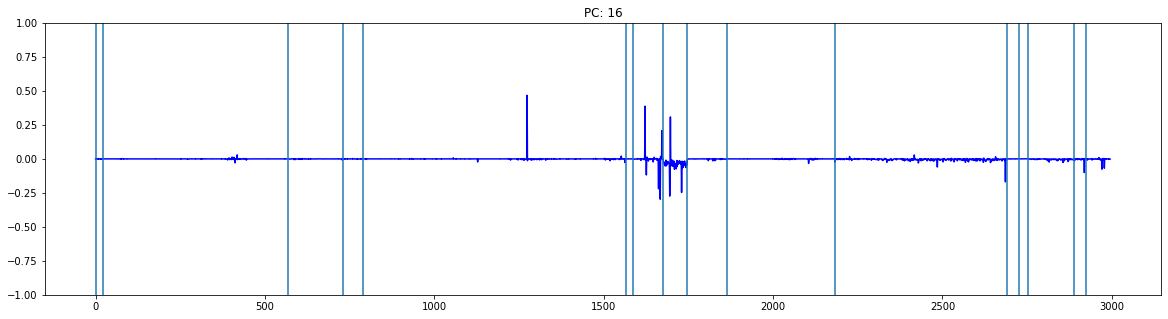

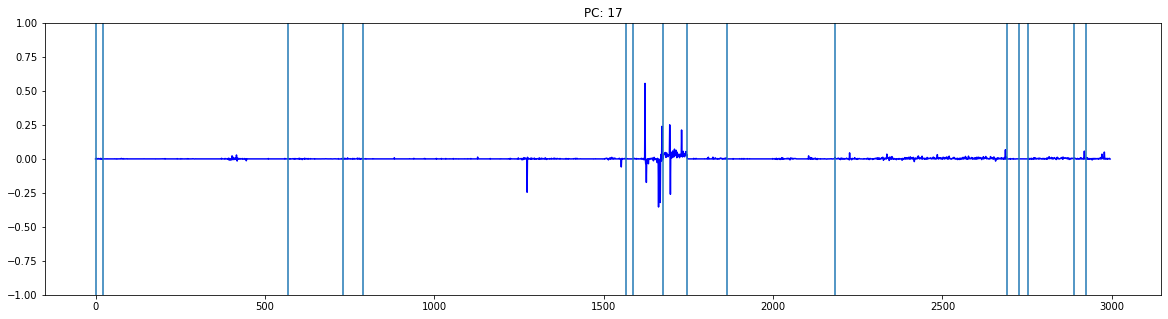

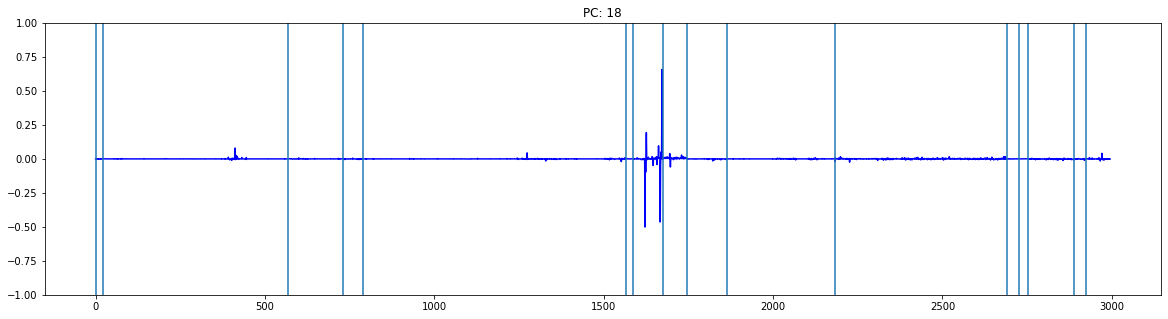

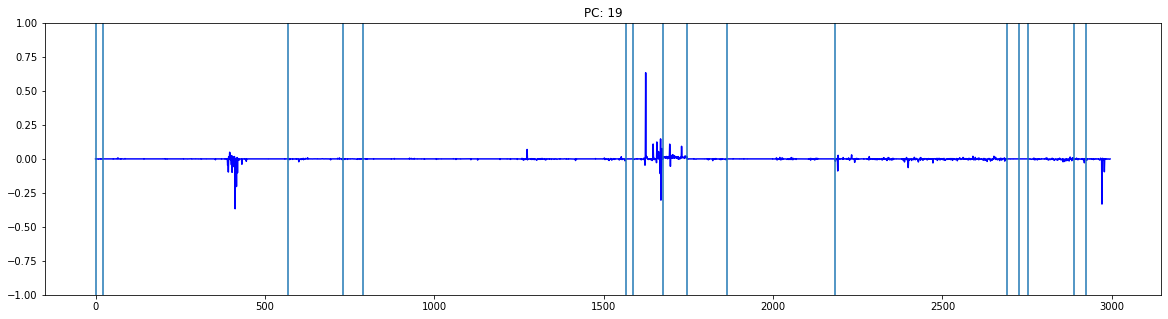

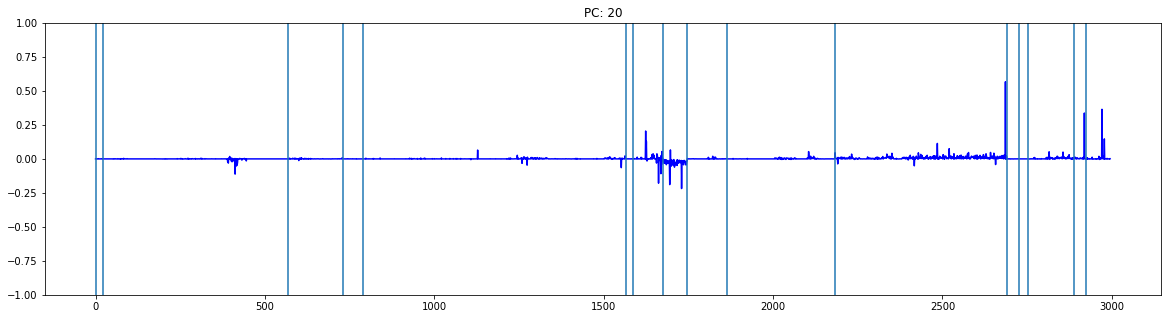

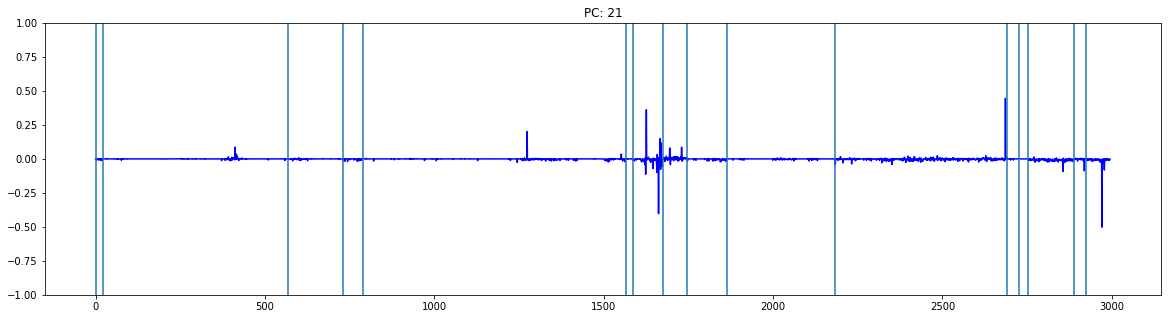

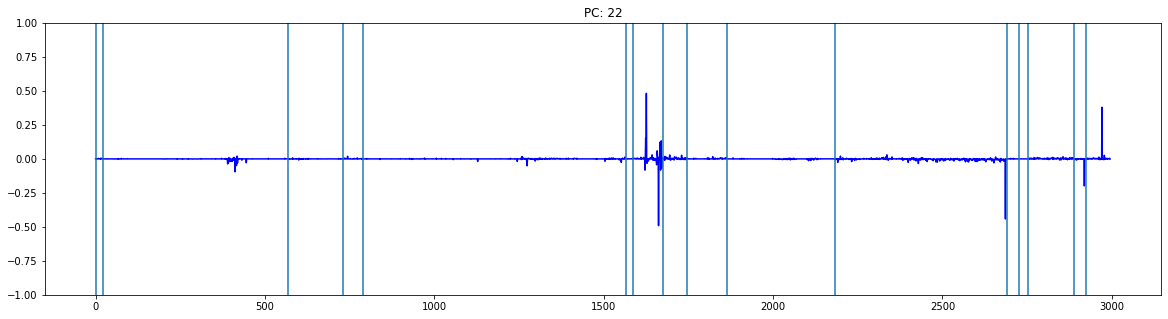

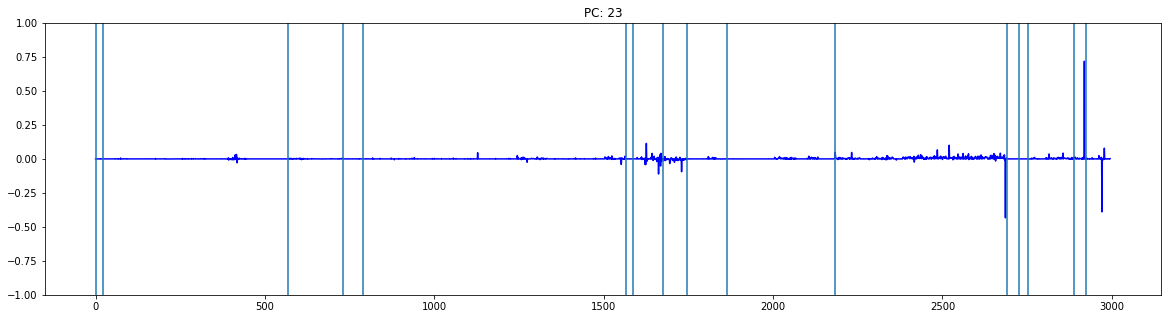

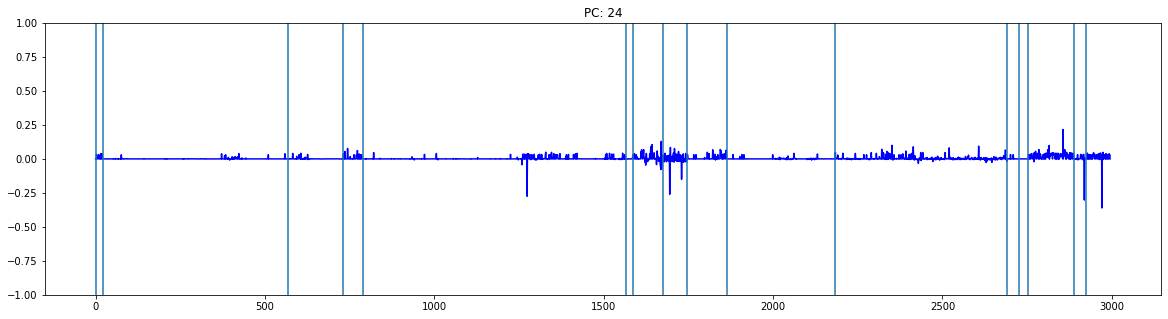

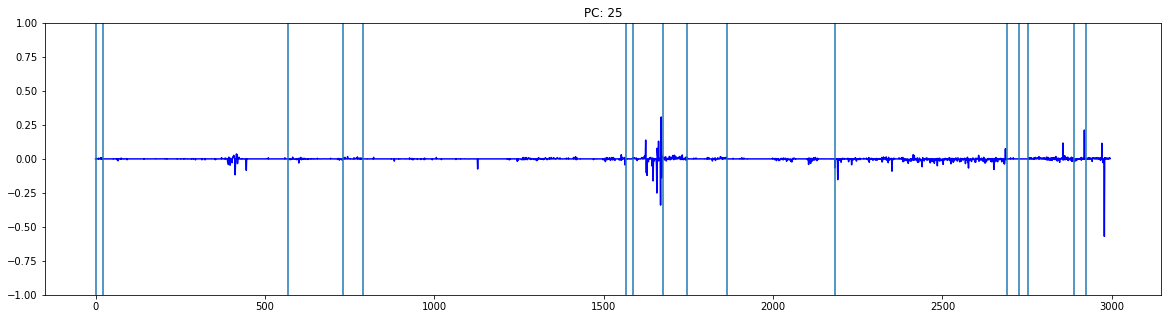

Bladder
Bladder
Bladder


In [ ]:
vals, vecs = pca_self(x)
cancer_names, cancer_index = cancer_places(y_names)
plot_pc1(vecs, cancer_index)
plot_pc_vecs(vecs, cancer_index)
print(y_names[1])
print(y_names[6])
print(y_names[11])
#PC 1 - 7 ()
# breast vanaf PC 12



only Colorectal / only blood

In [ ]:
# 'Bladder', 'Blood', 'Bone', 'Brain', 'Breast', 'Cervix', 'Colorectal', 'Gall Bladder', 'Head and neck', 'Kidney', 'Liver', 'Mesenchymal', 'Nervous system', 'Ovary', 'Stomach', 'Uterus'

In [ ]:
def keep_or_drop_cancer(df, list_cancers, keep_drop):
  if keep_drop == 'keep':
    df = df.loc[df['cancer'].isin(list_cancers)]
  else:
    df = df.loc[~df['cancer'].isin(list_cancers)]
  cancer_list = df['cancer']
  total_read_list = df['total_read']
  df_select = df.drop(['total_read', 'cancer'], axis=1)
  df_select = df_select.set_index('donor_id')
  df_cancer = df.drop(['total_read'], axis=1)
  df_cancer = df_cancer.set_index('donor_id')
  df.loc[df['cancer'] == 'Colorectal']

  y_names = df_cancer.loc[:,'cancer'].values
  #Standardize the Data
  labels = {'Bladder': 1,
            'Blood': 2,
            'Bone': 3,
            'Brain': 4,
            'Breast': 5,
            'Cervix': 6,
            'Colorectal': 7,
            'Gall Bladder': 8,
            'Head and neck': 9,
            'Kidney': 10,
            'Liver' : 11,
            'Mesenchymal': 12,
            'Nervous system': 13,
            'Ovary': 14,
            'Stomach': 15,
            'Uterus': 16}
  # df_cancer["cancer"] = df_cancer["cancer"].map(labels)

  y = df_cancer.loc[:,'cancer'].values
  x = df_cancer.iloc[:,:-1].values
  # PCA is effected by scale so you need to scale the features in your data before applying PCA
  scaled_df = StandardScaler().fit_transform(x)
  return y_names, x, y, scaled_df




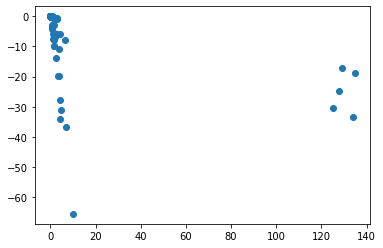

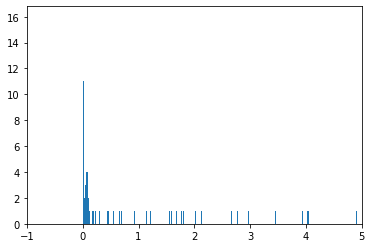

90
['Colorectal']
[0]


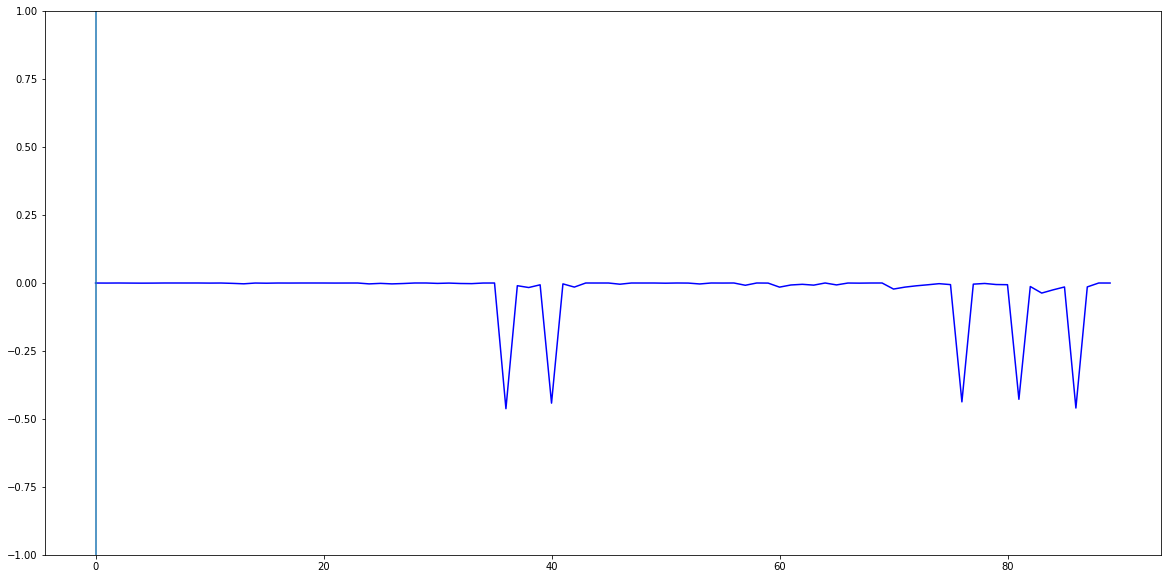

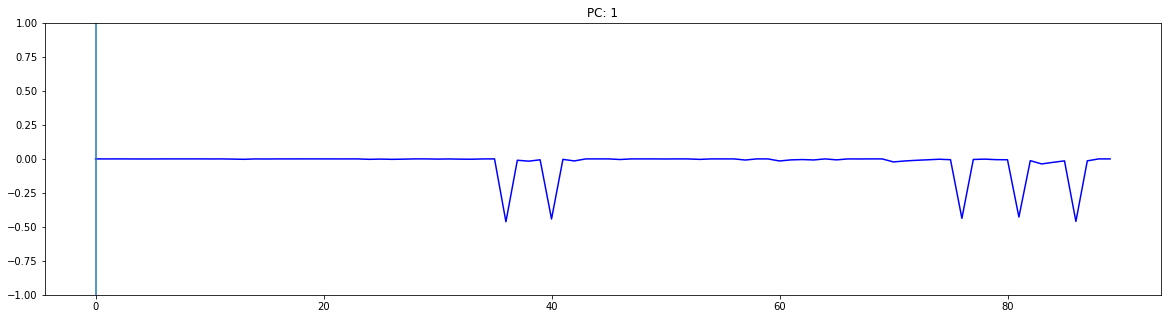

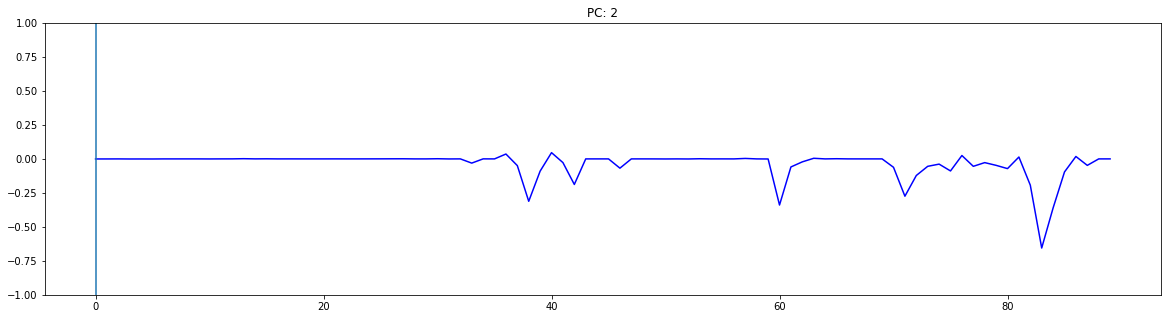

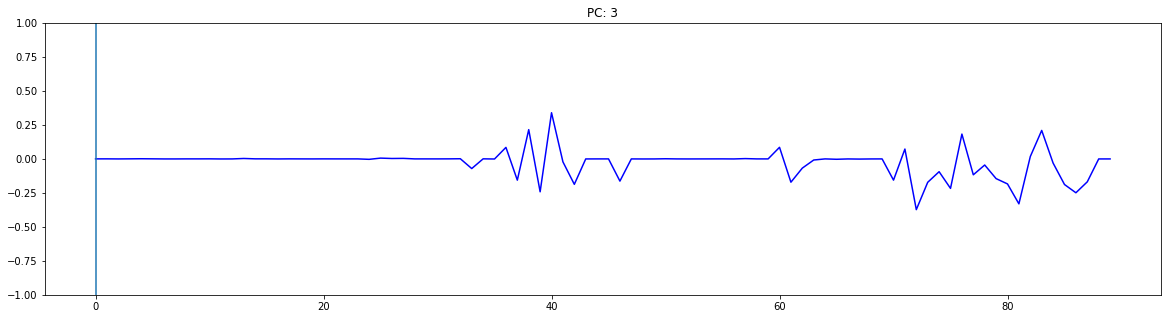

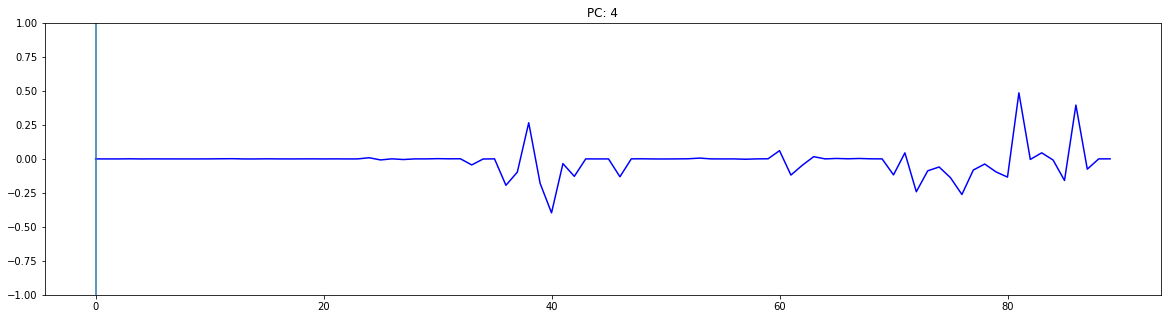

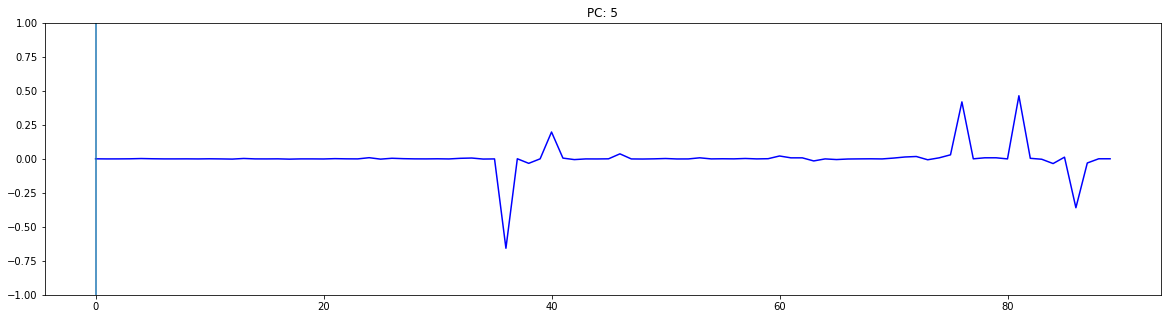

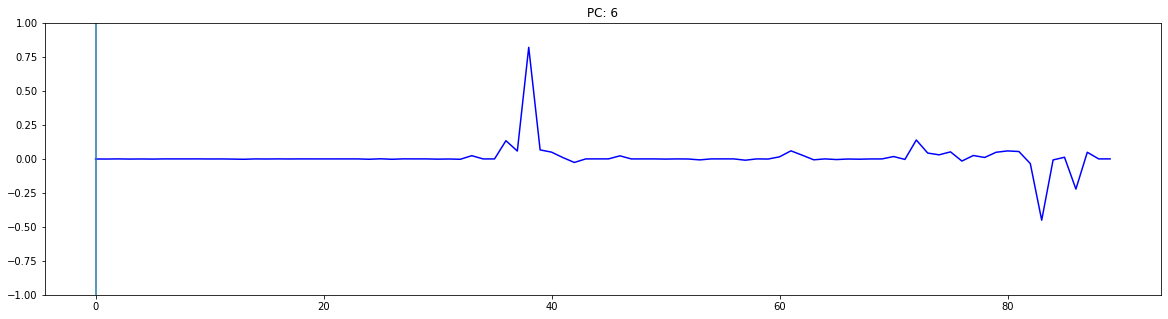

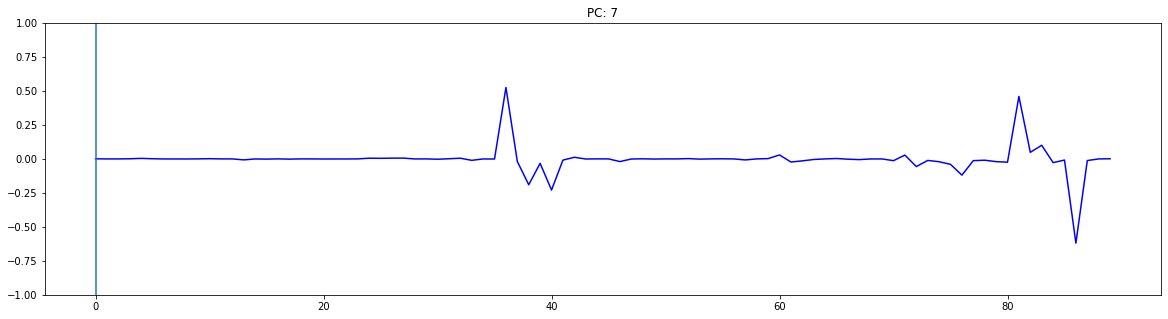

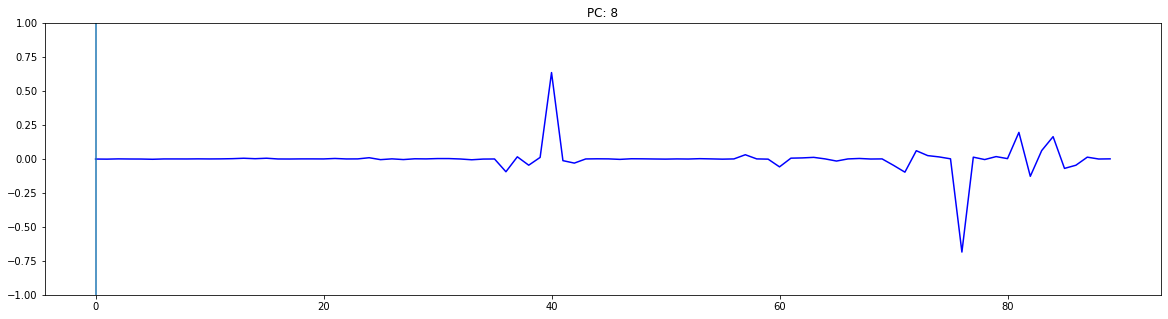

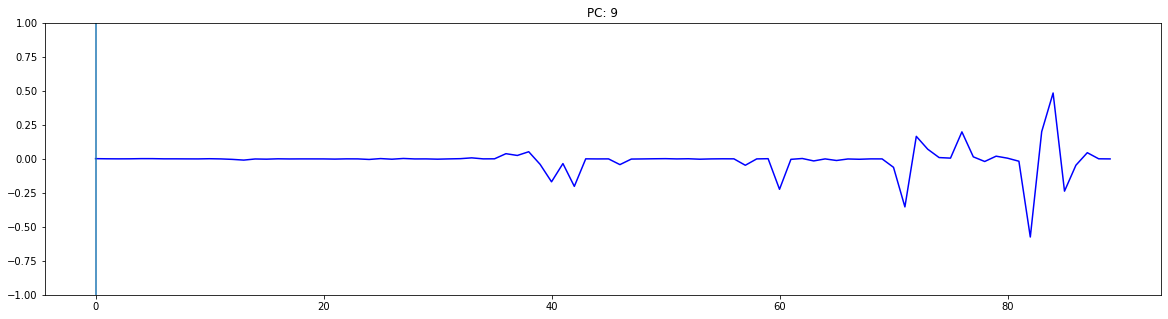

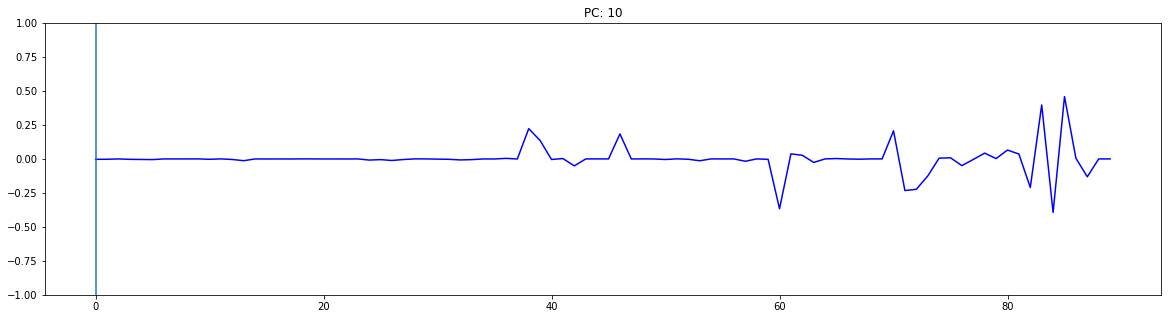

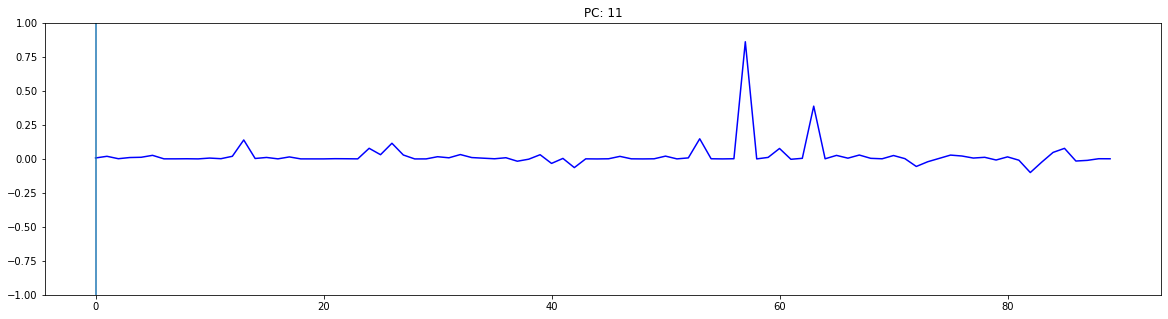

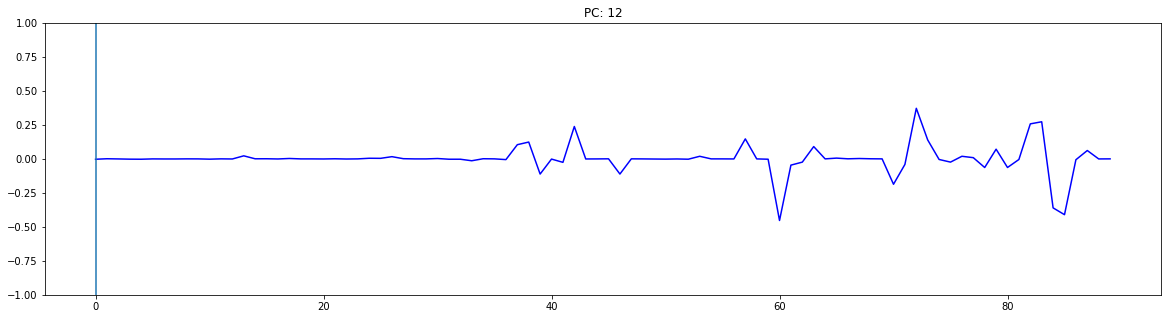

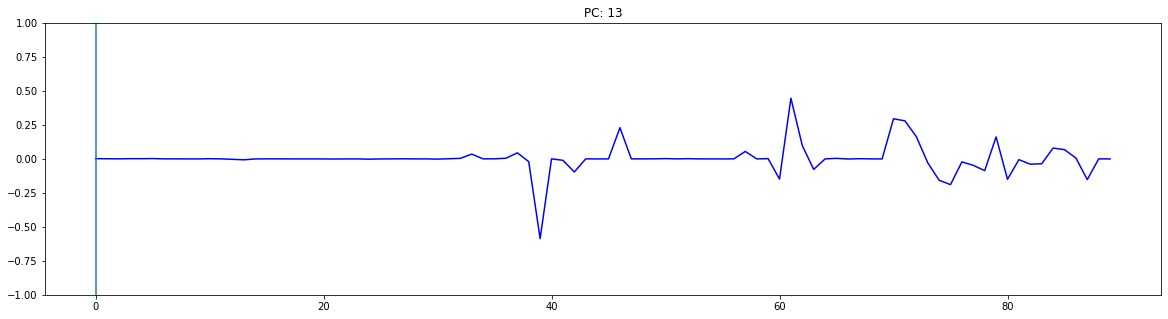

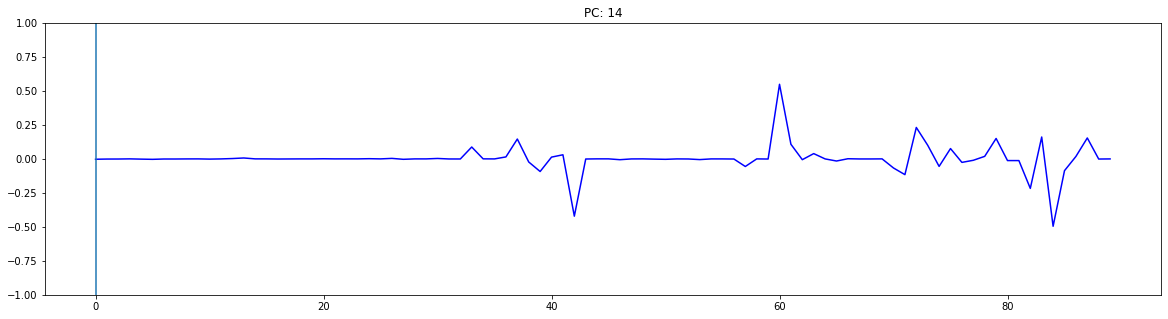

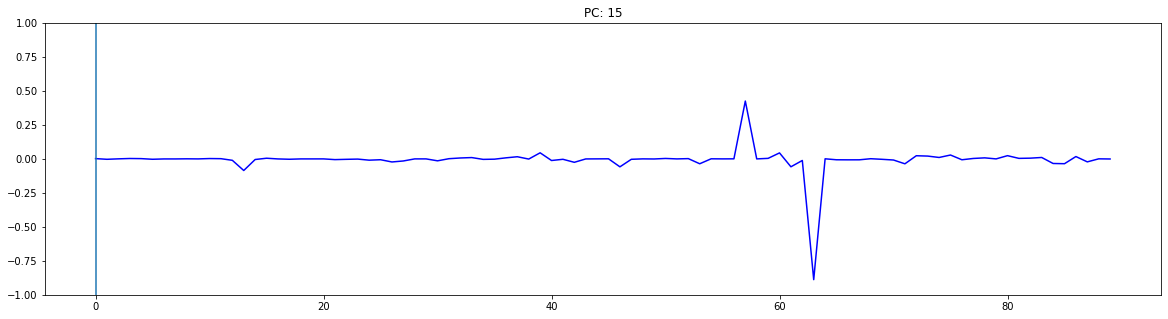

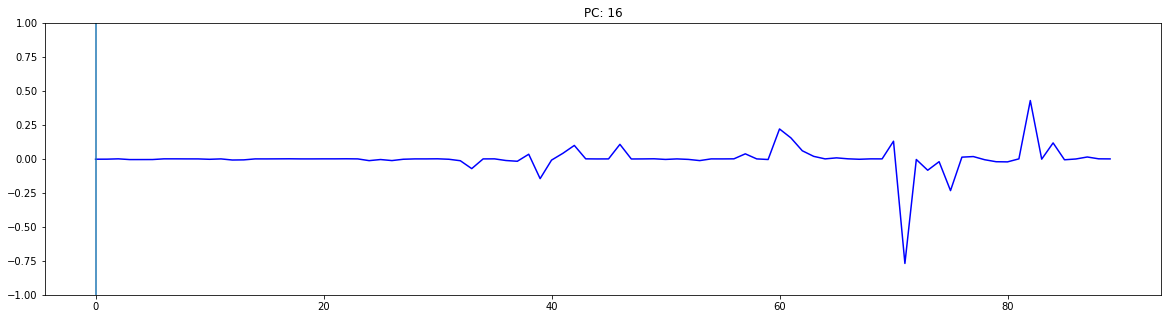

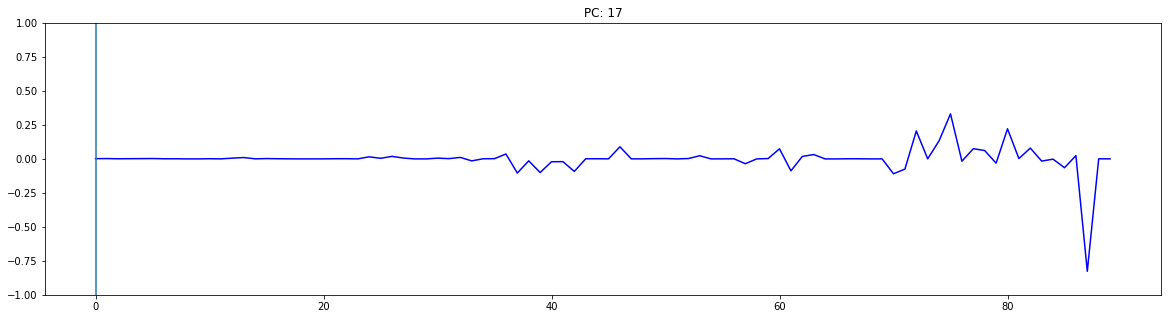

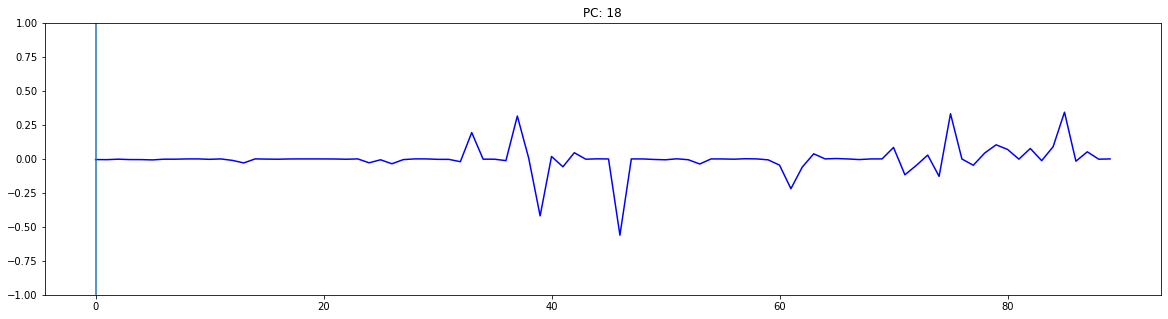

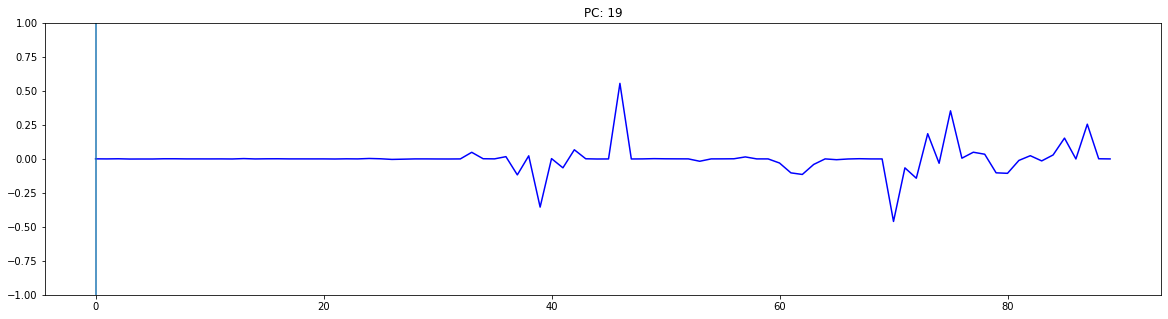

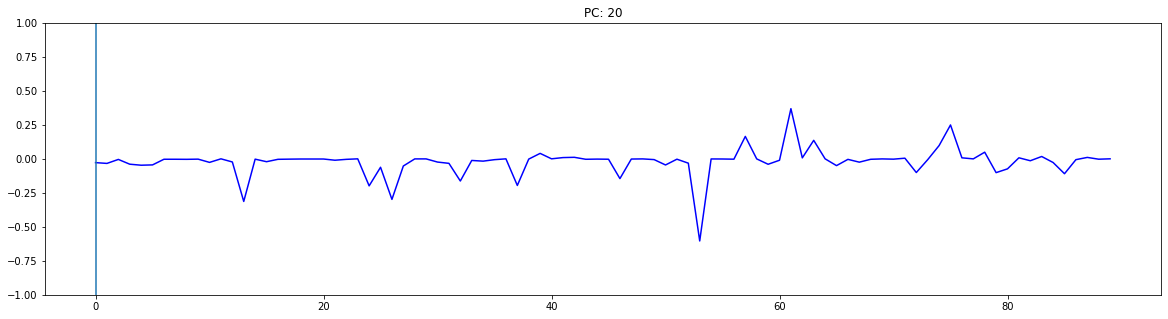

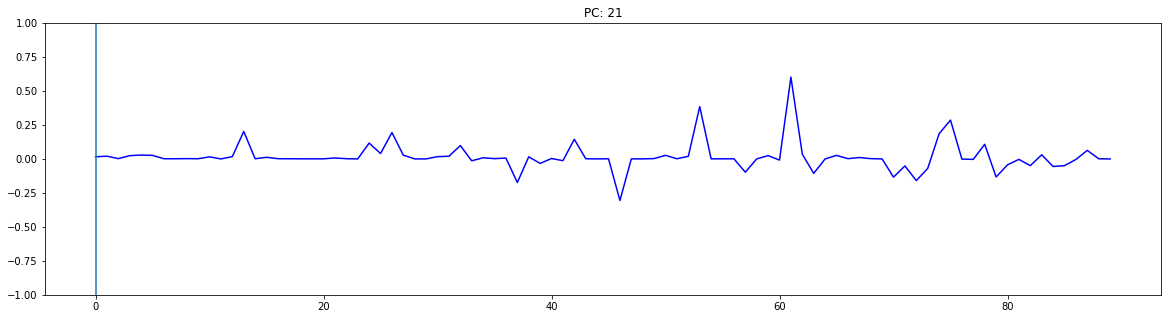

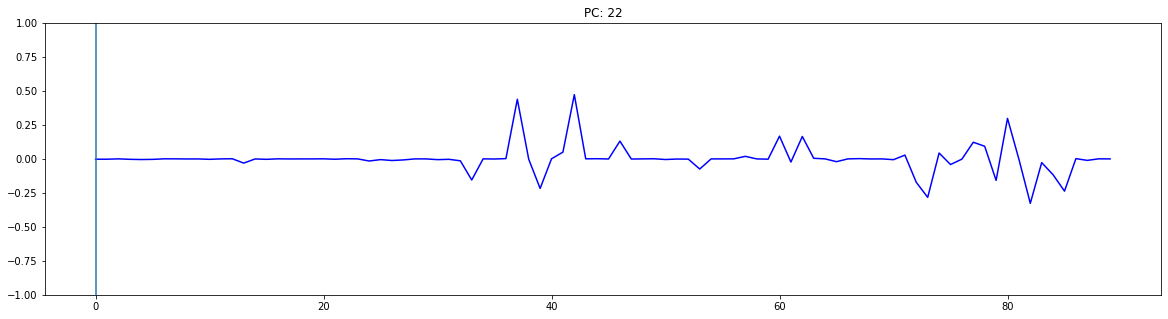

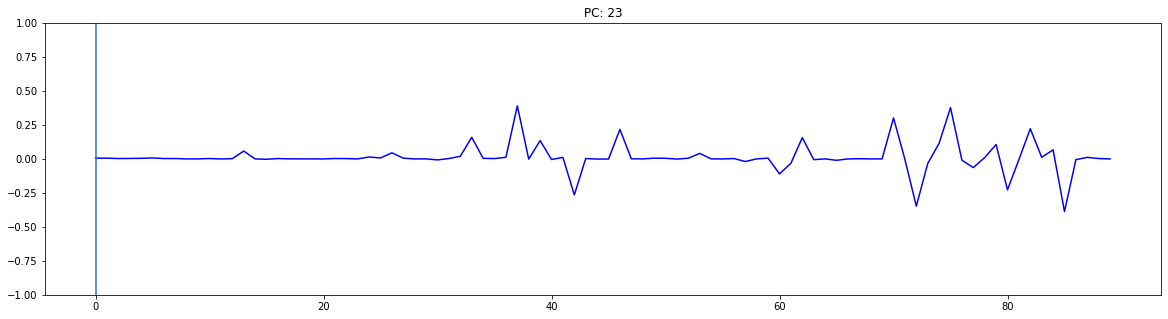

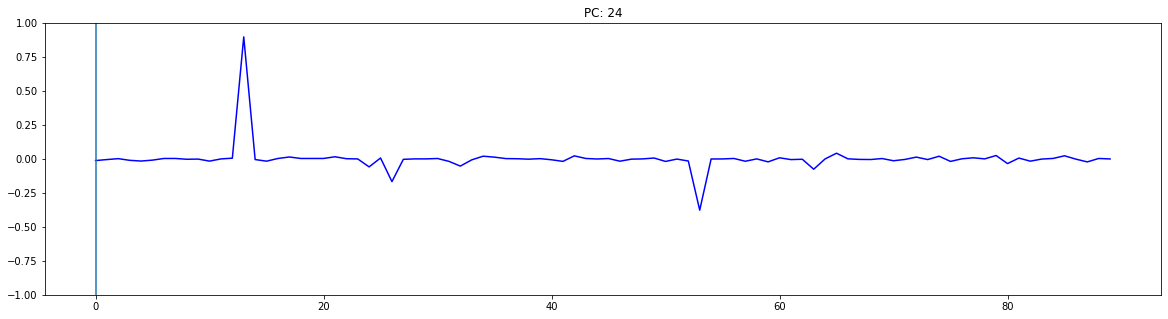

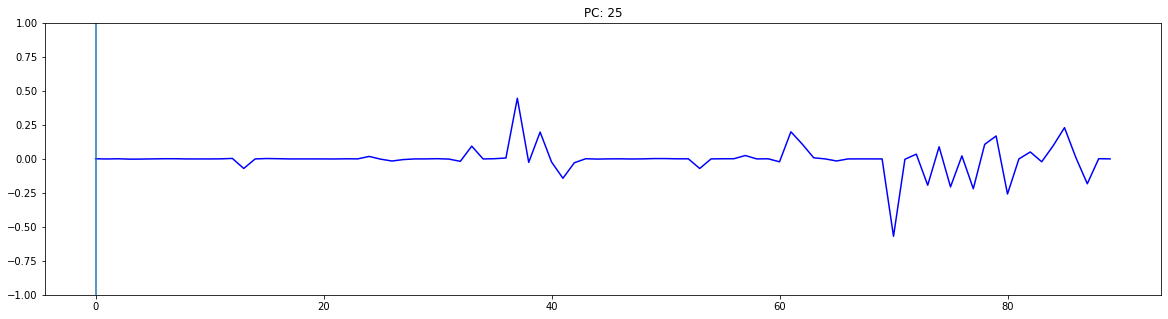

In [ ]:
y_names_colorectal, x_colorectal, y_colorectal, scaled_df_colorectal = keep_or_drop_cancer(df, ['Colorectal'], 'keep')
vals_colorectal, vecs_colorectal = pca_self(x_colorectal)
cancer_names_colorectal, cancer_index_colorectal = cancer_places(y_names_colorectal)
plot_pc1(vecs_colorectal, cancer_index_colorectal)
plot_pc_vecs(vecs_colorectal, cancer_index_colorectal)

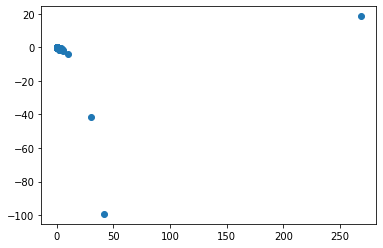

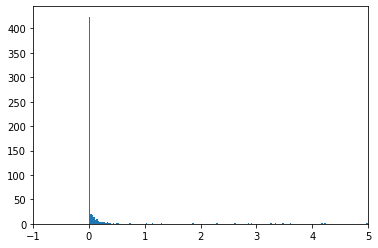

545
['Blood']
[0]


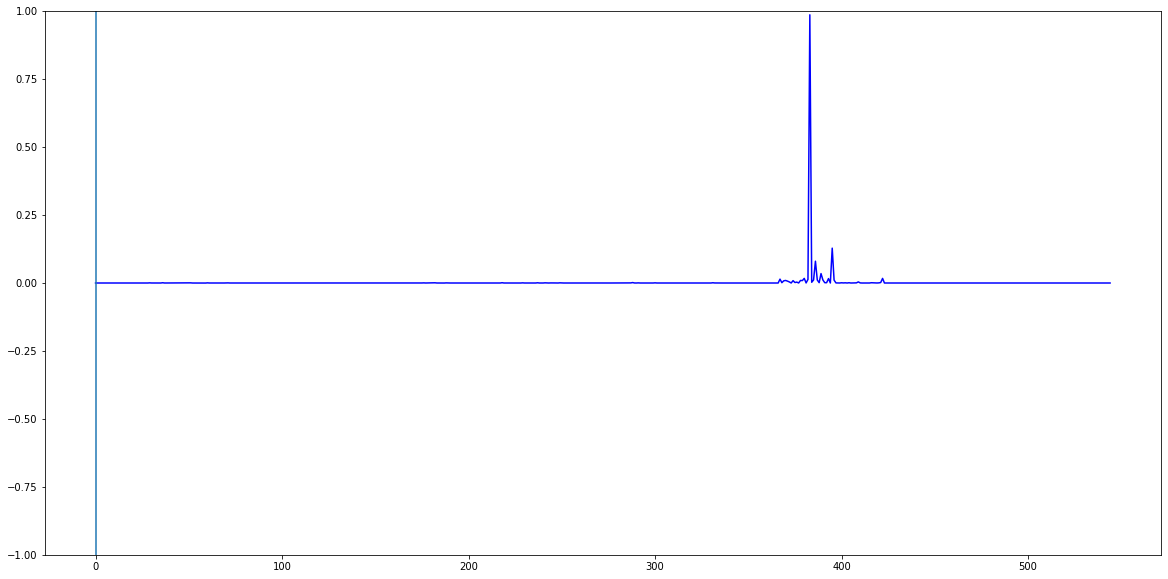

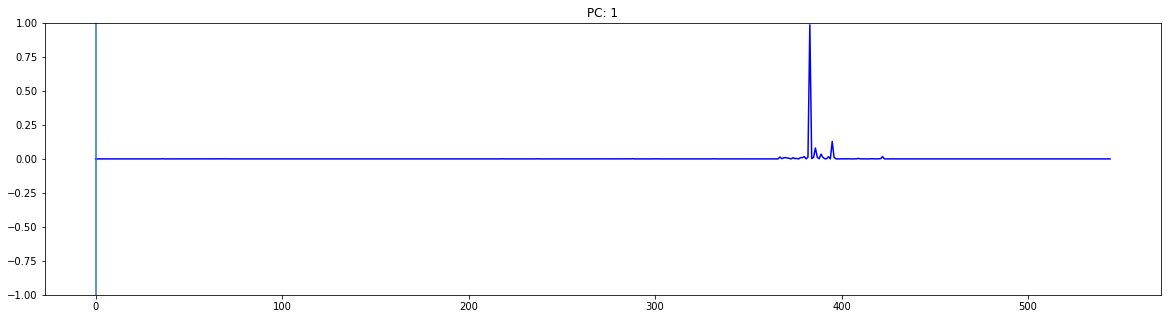

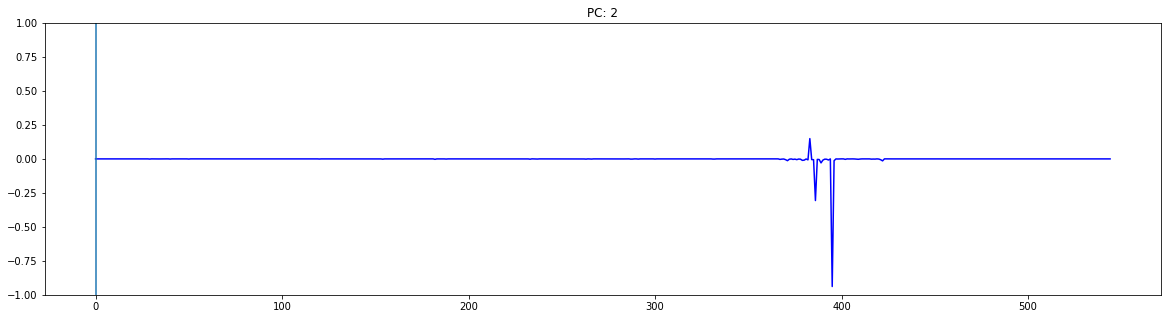

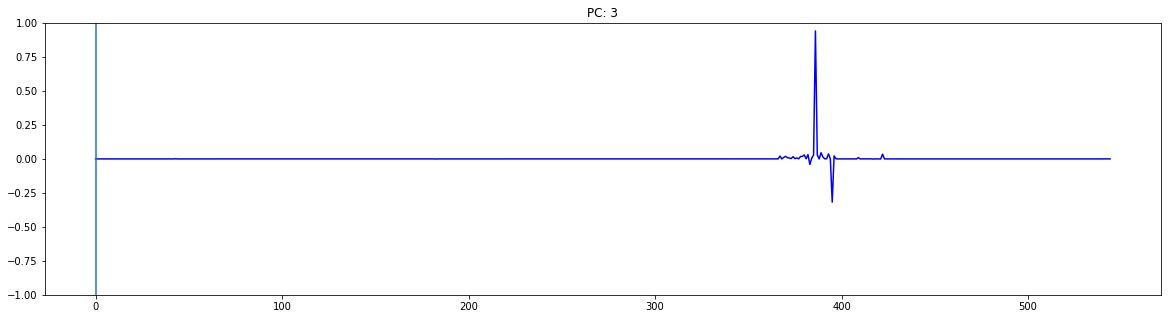

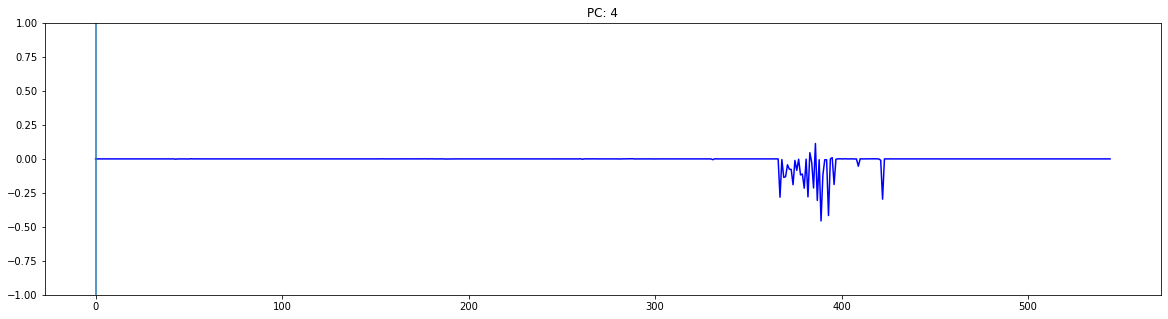

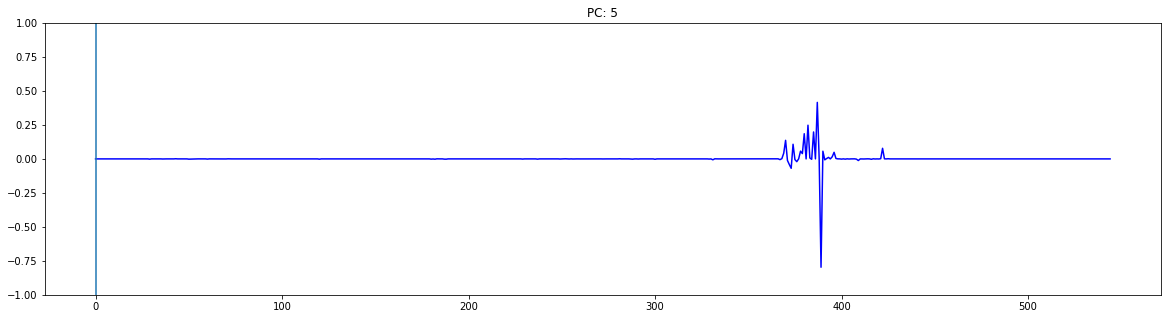

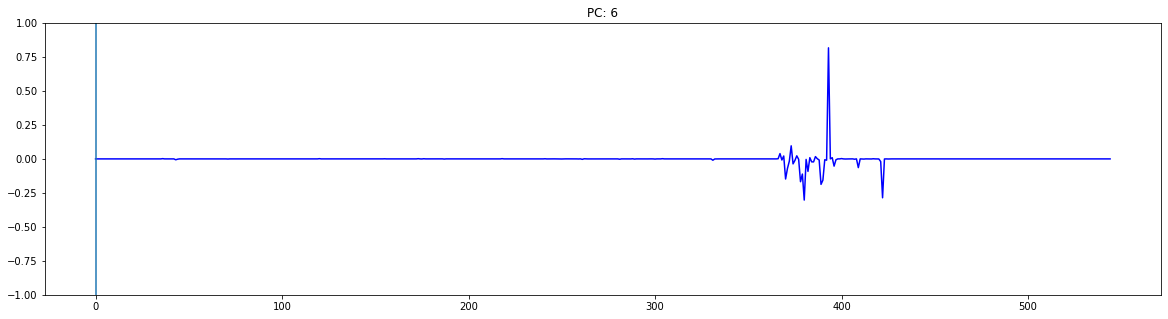

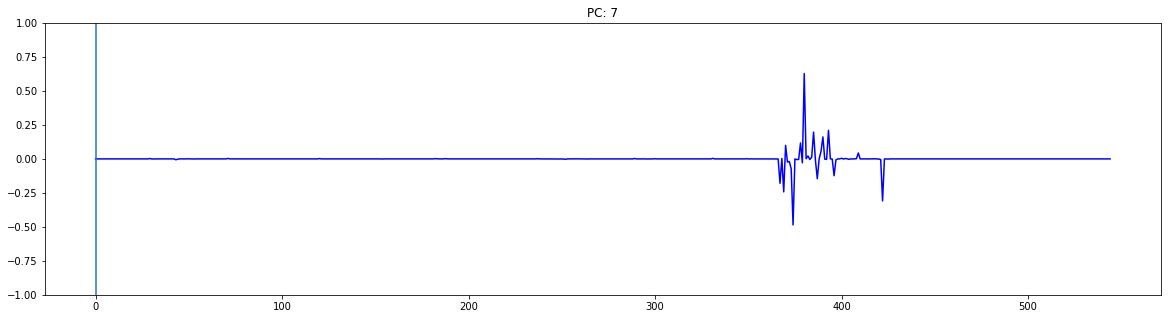

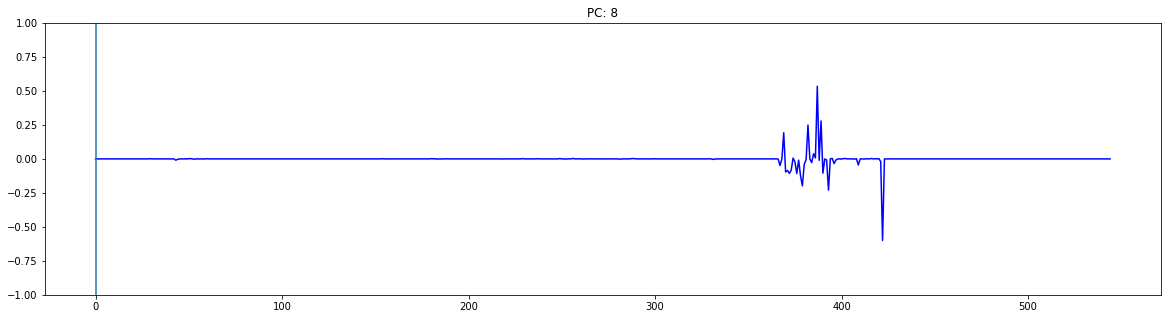

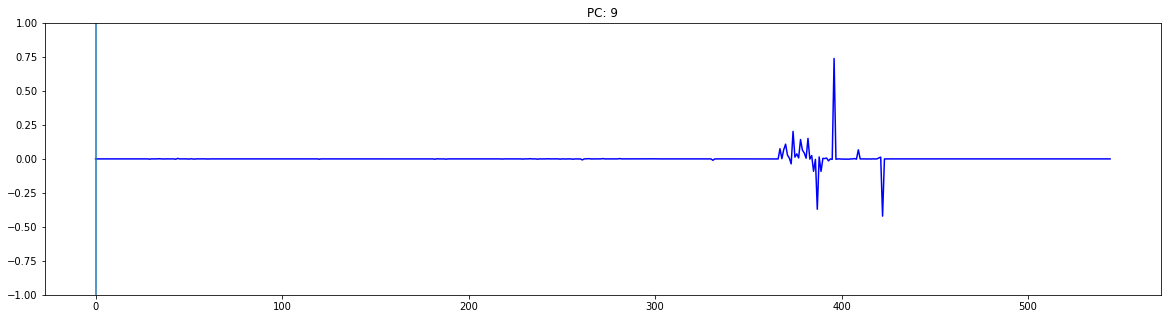

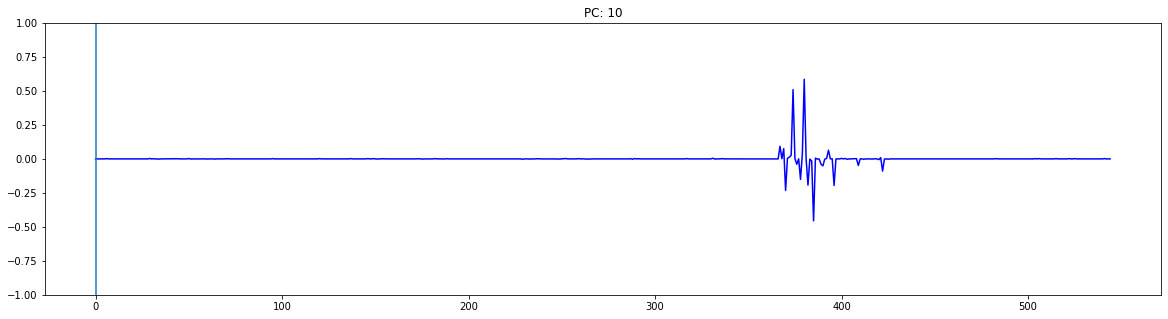

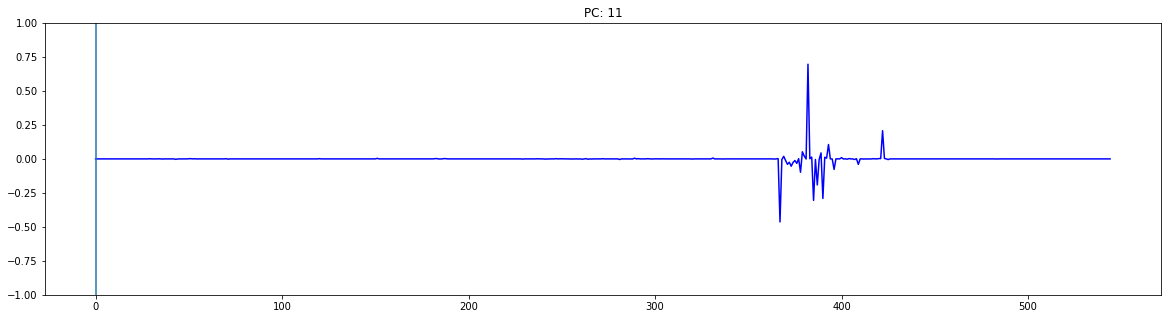

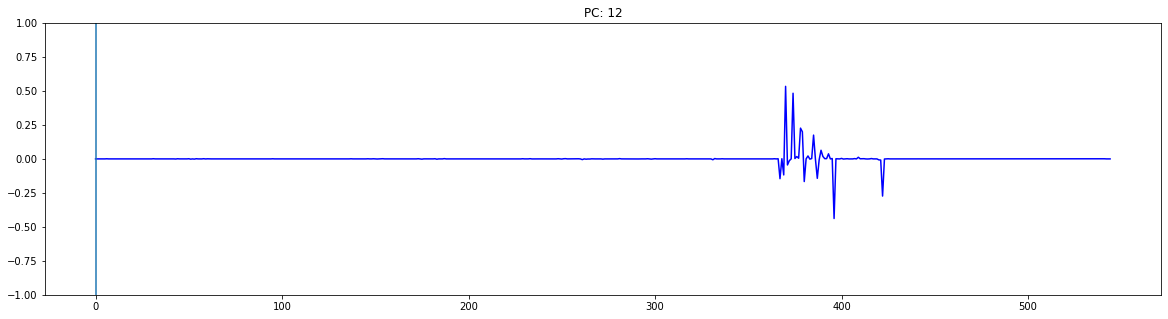

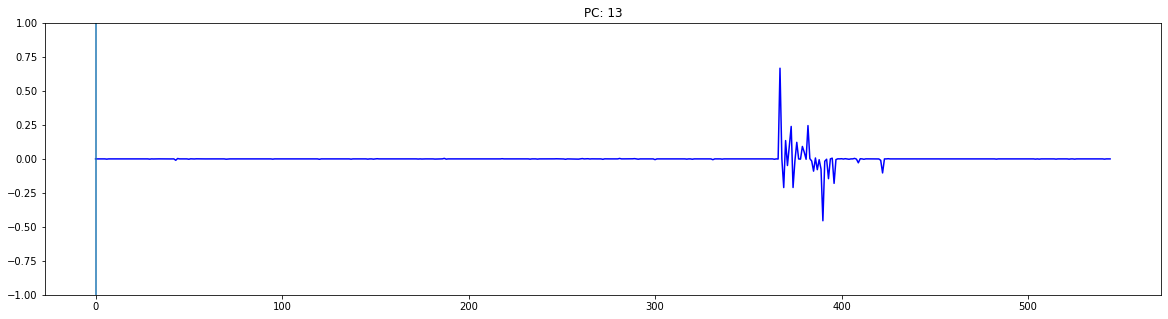

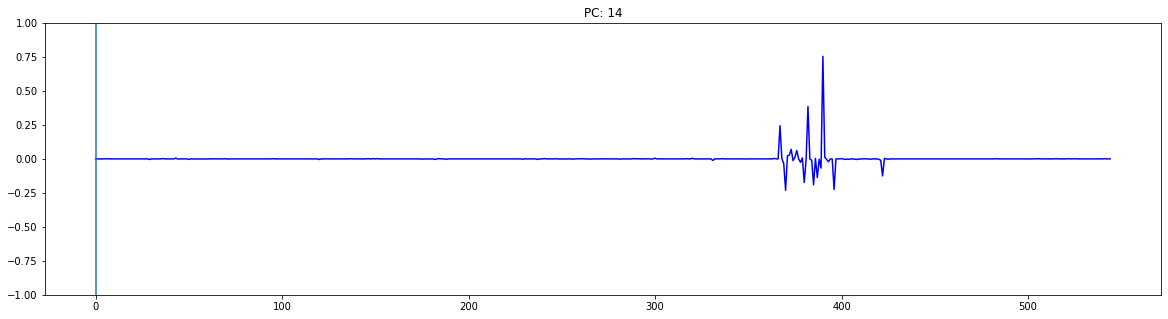

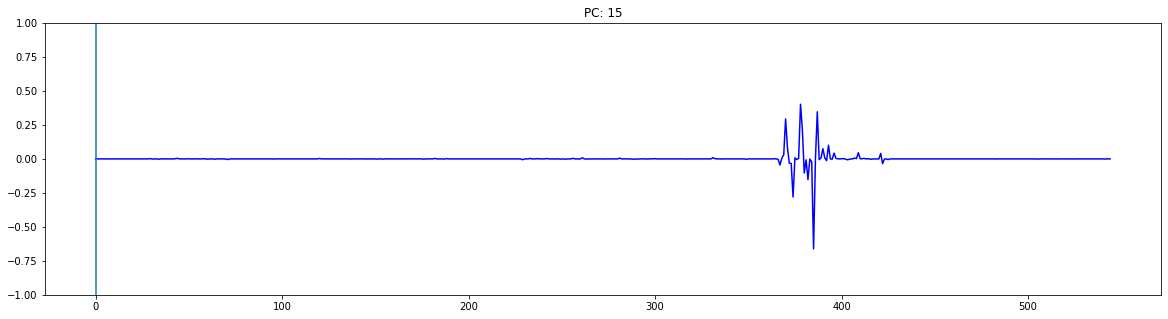

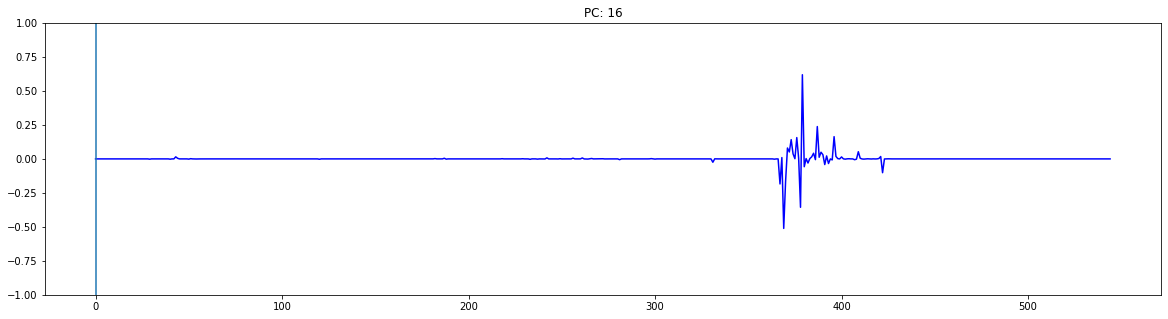

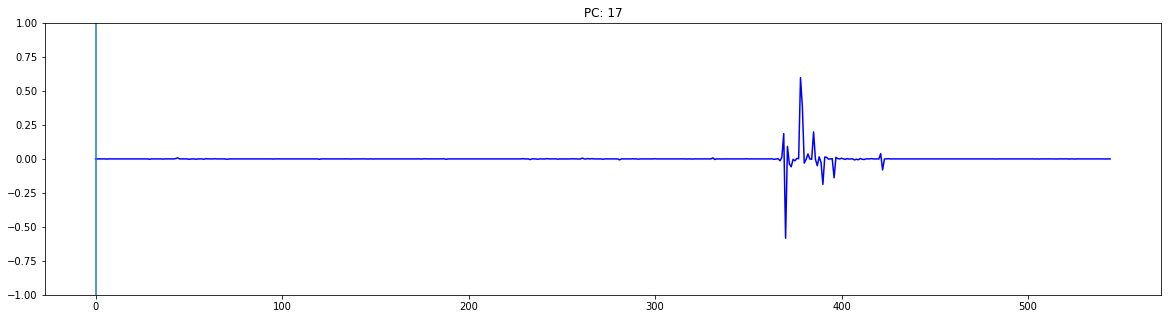

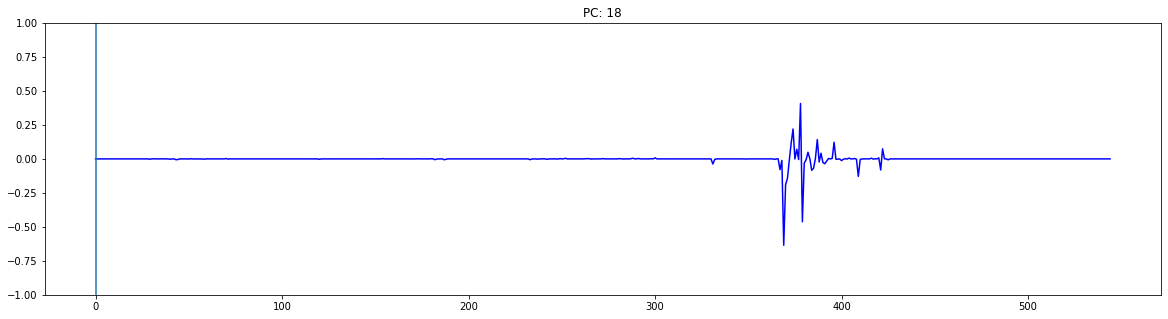

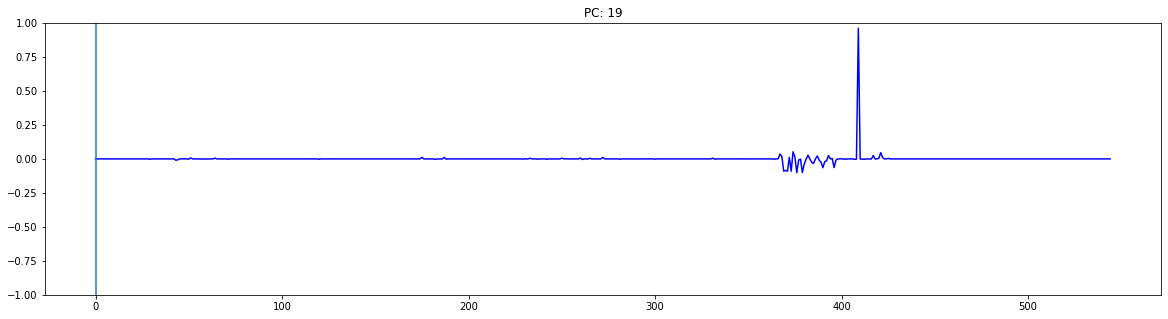

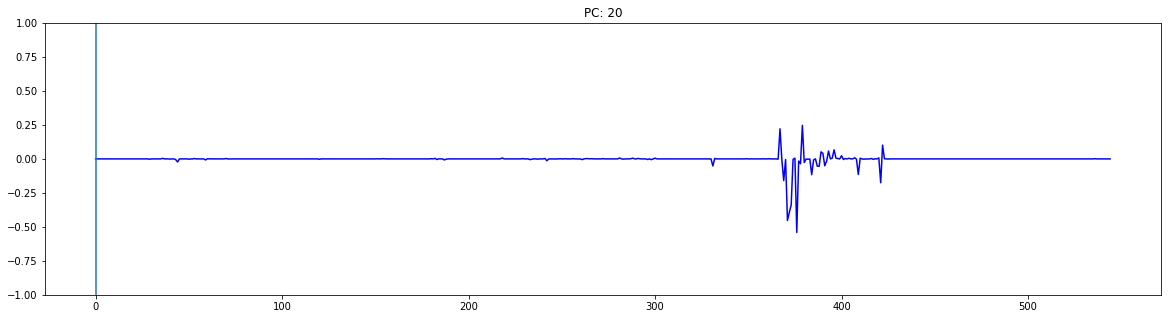

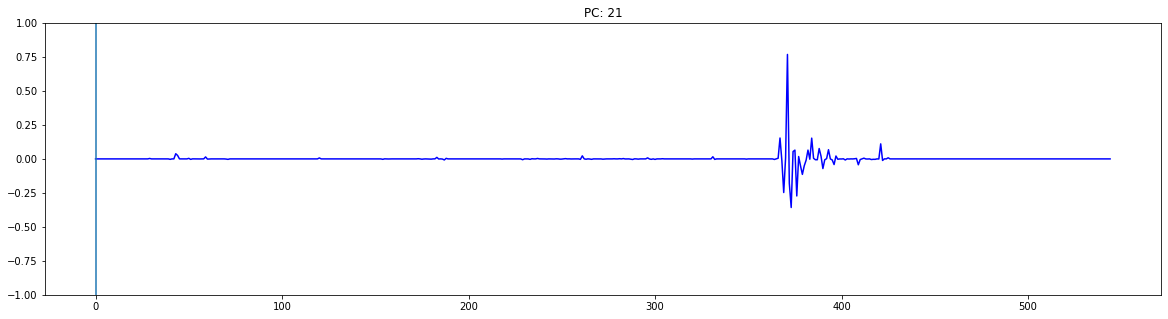

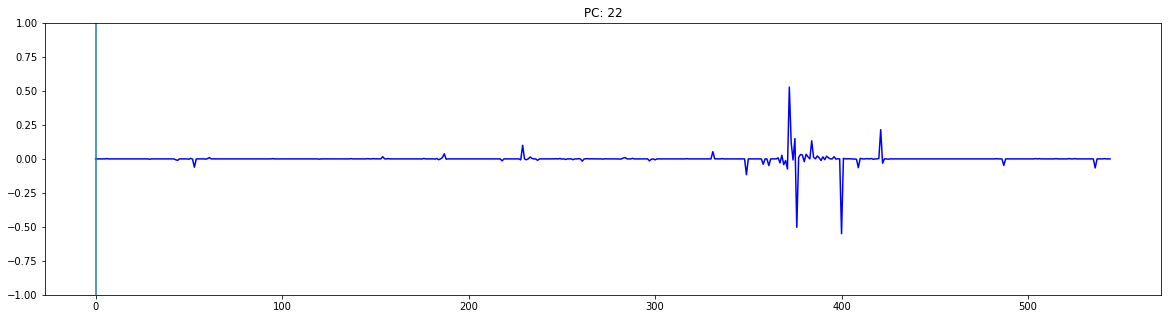

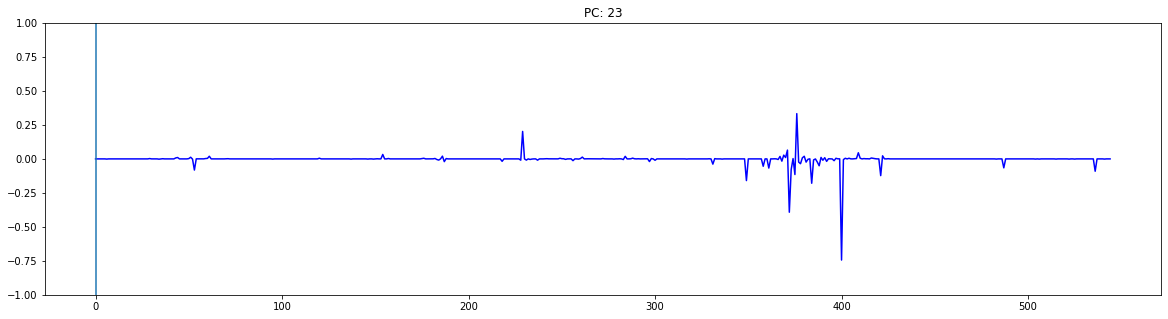

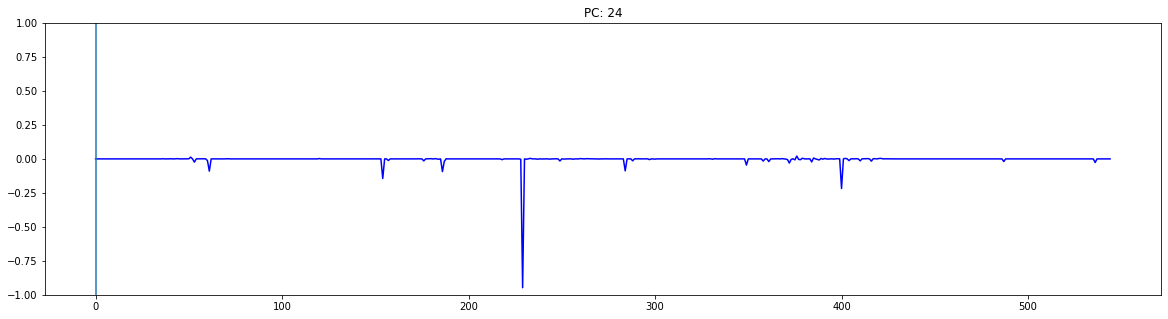

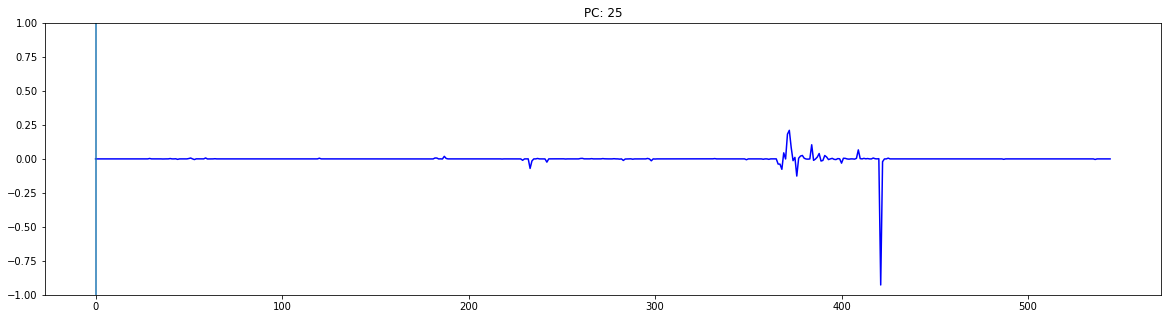

In [ ]:
y_names_blood, x_blood, y_blood, scaled_df_blood = keep_or_drop_cancer(df, ['Blood'], 'keep')
vals_blood, vecs_blood = pca_self(x_blood)
cancer_names_blood, cancer_index_blood = cancer_places(y_names_blood)
plot_pc1(vecs_blood, cancer_index_blood)
plot_pc_vecs(vecs_blood, cancer_index_blood)

remove colorectal and blood

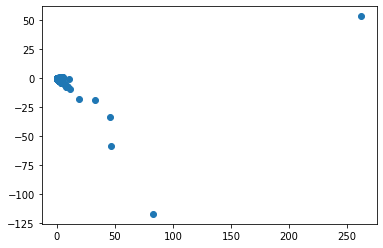

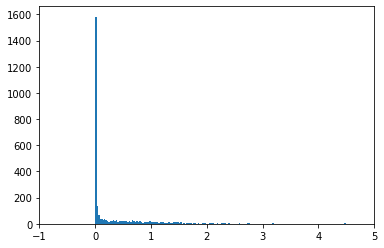

2906
['Bladder', 'Blood', 'Bone', 'Brain', 'Breast', 'Cervix', 'Gall Bladder', 'Head and neck', 'Kidney', 'Liver', 'Mesenchymal', 'Nervous system', 'Ovary', 'Stomach', 'Uterus']
[0, 23, 568, 730, 789, 1566, 1586, 1657, 1774, 2092, 2601, 2635, 2663, 2798, 2835]


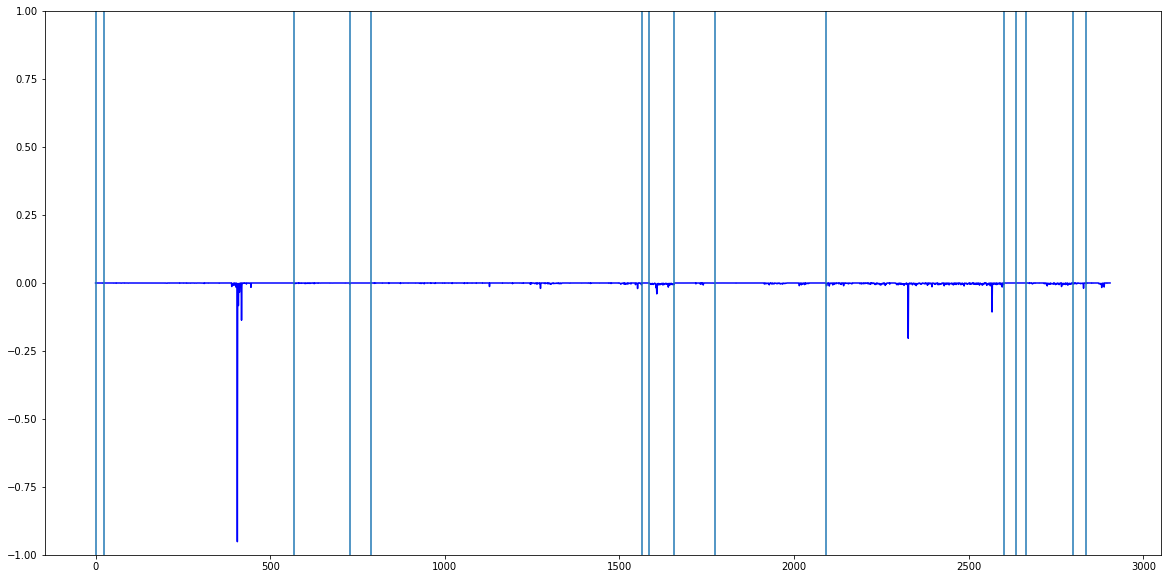

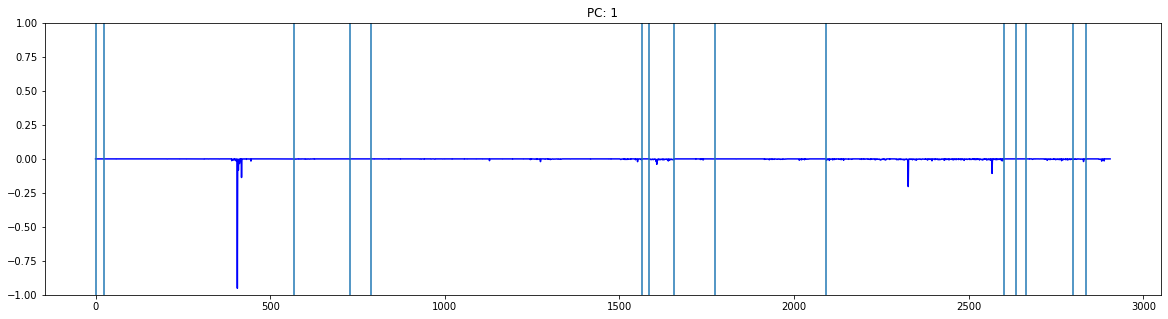

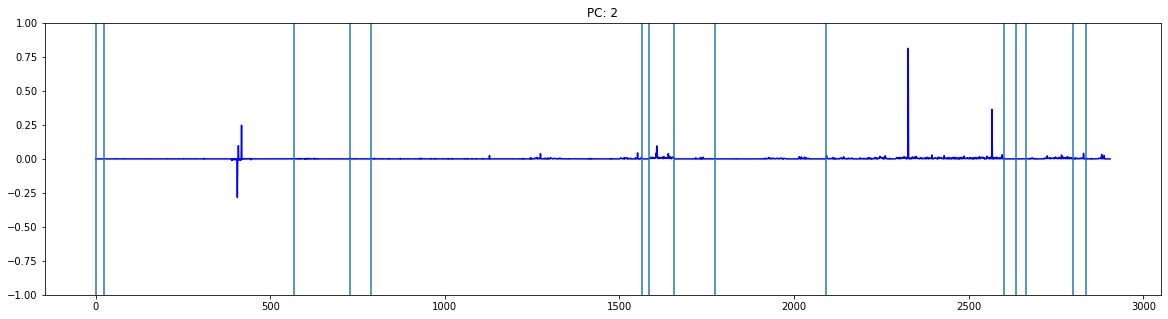

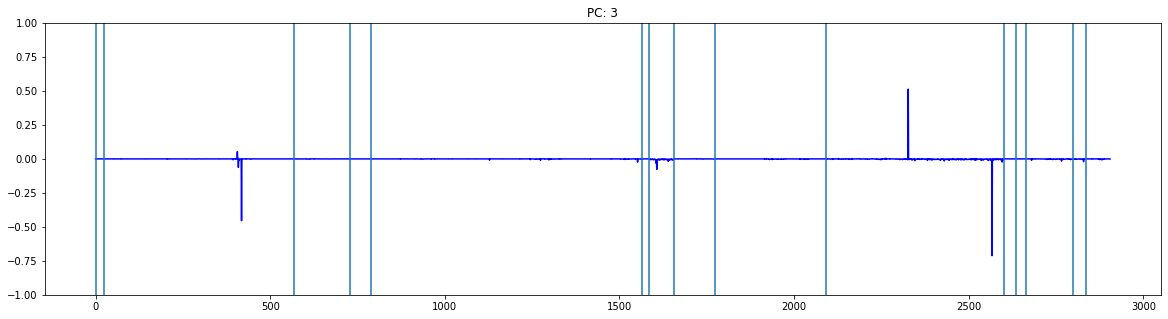

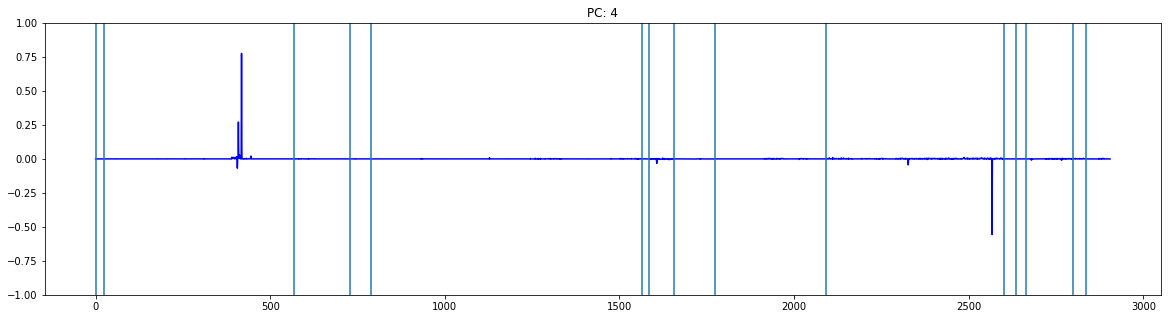

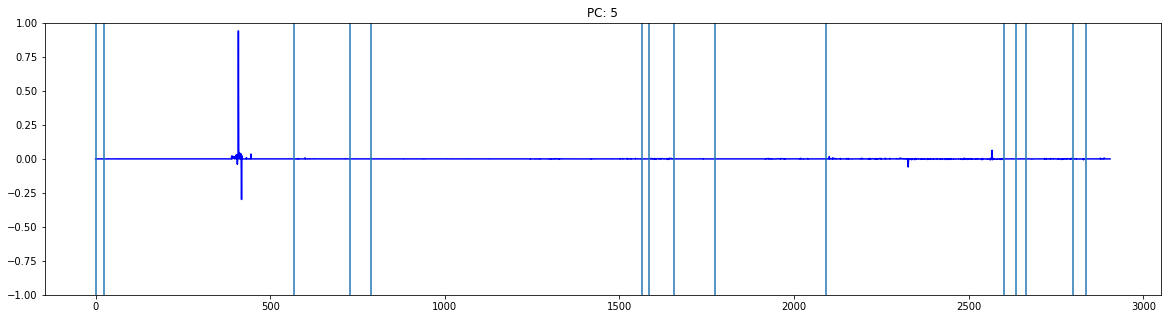

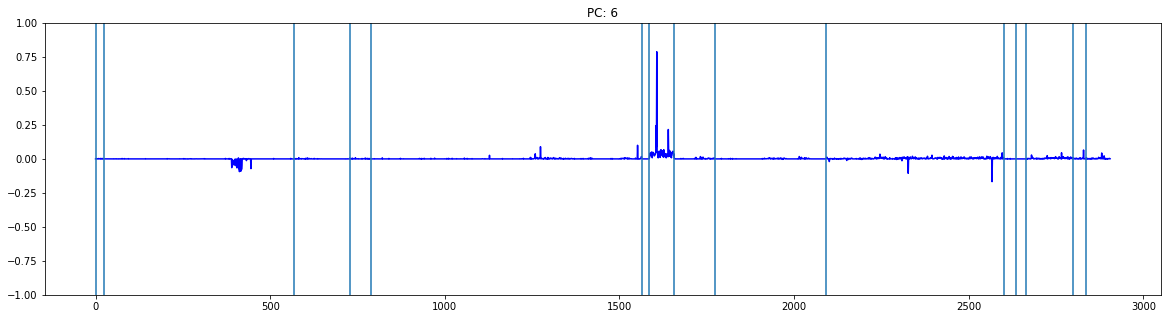

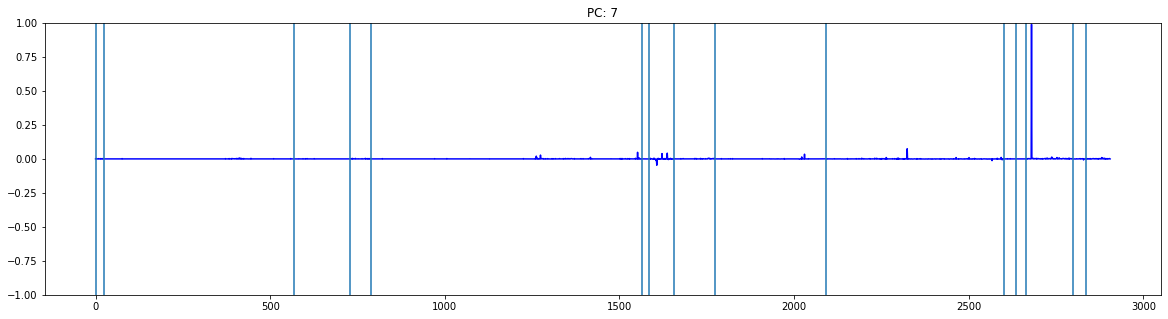

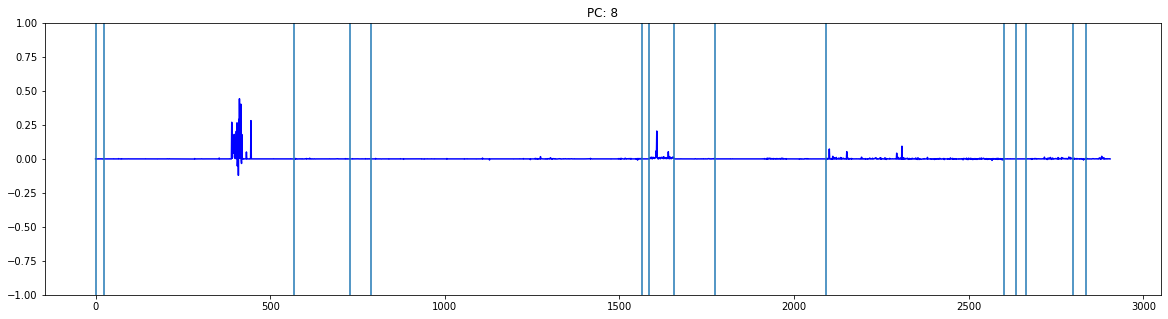

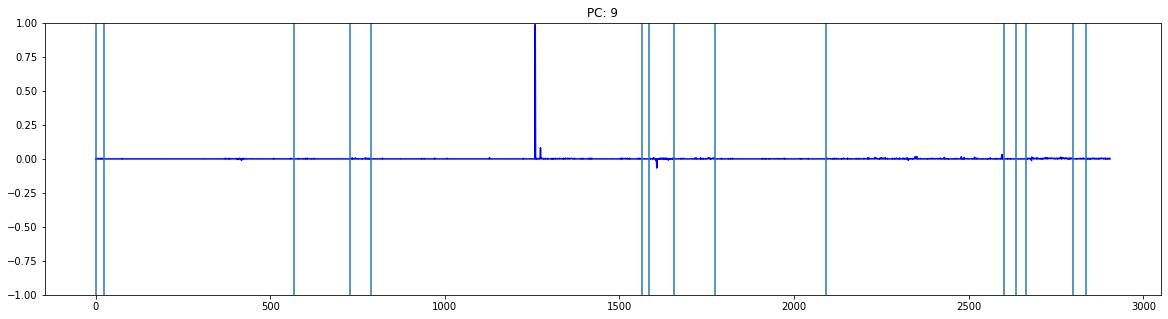

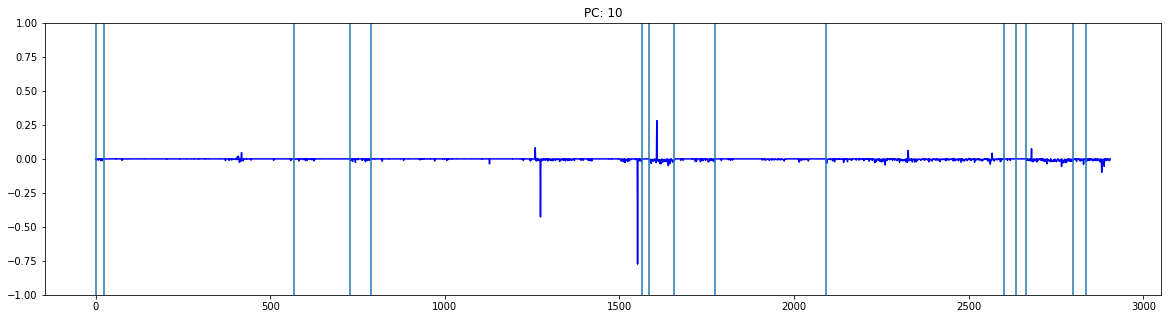

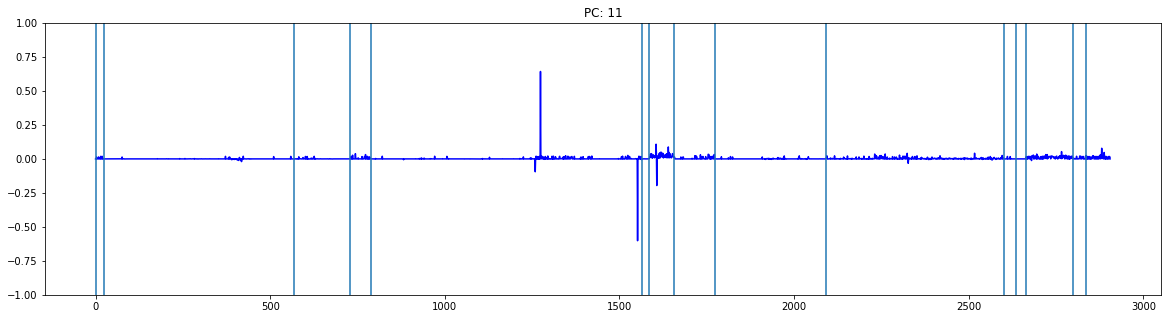

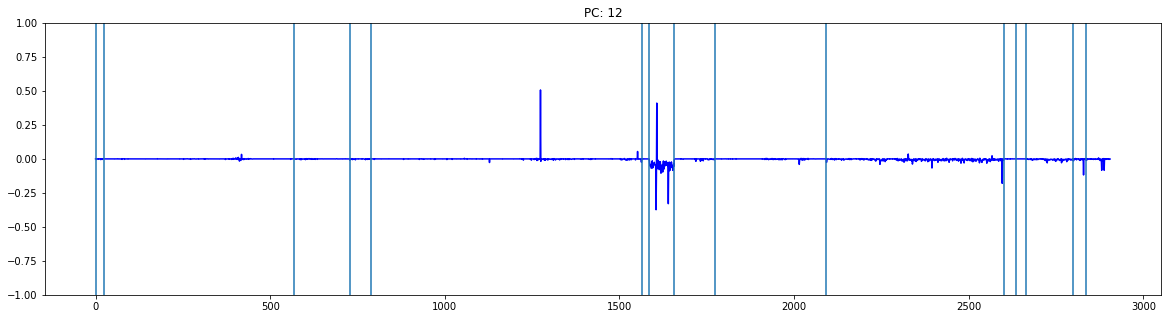

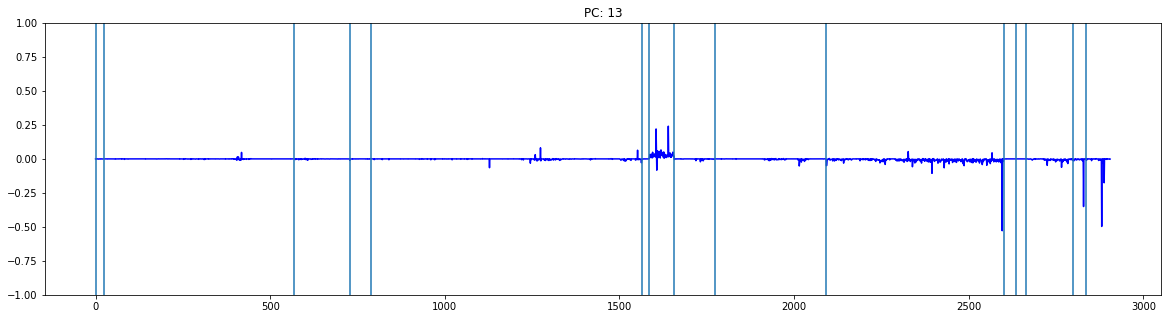

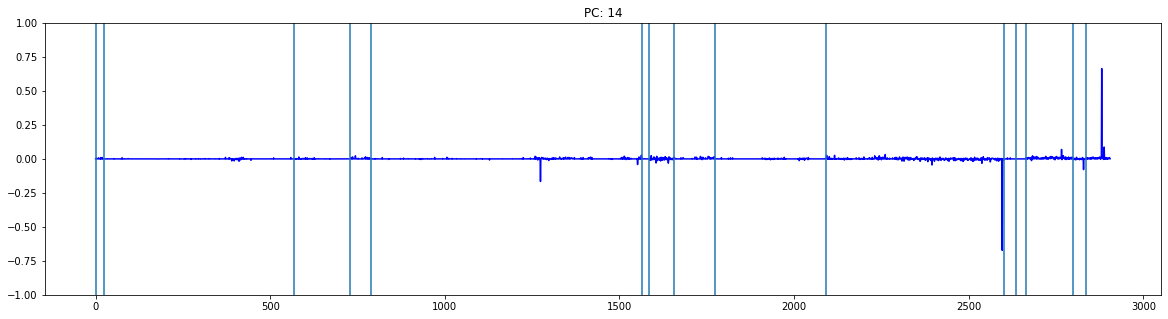

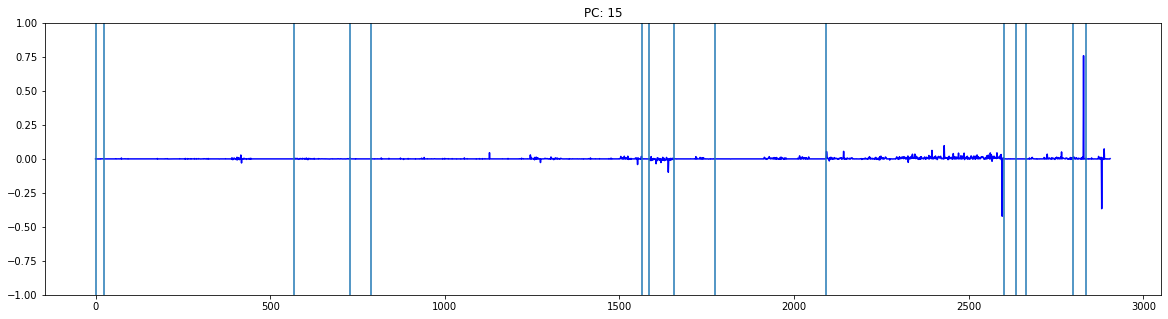

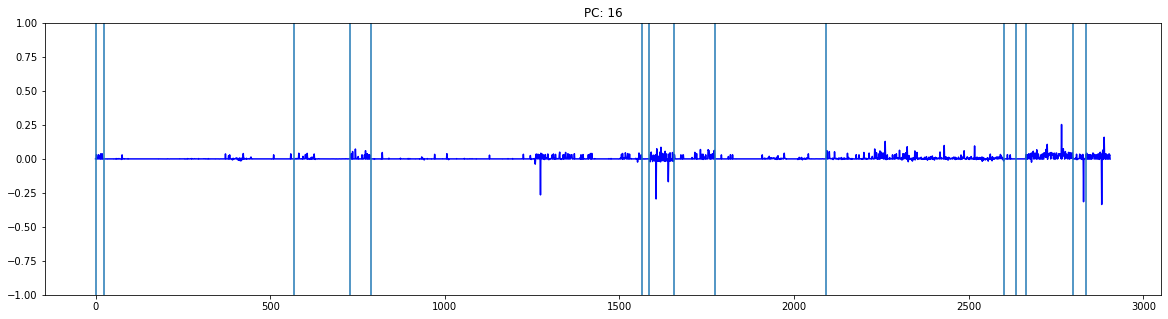

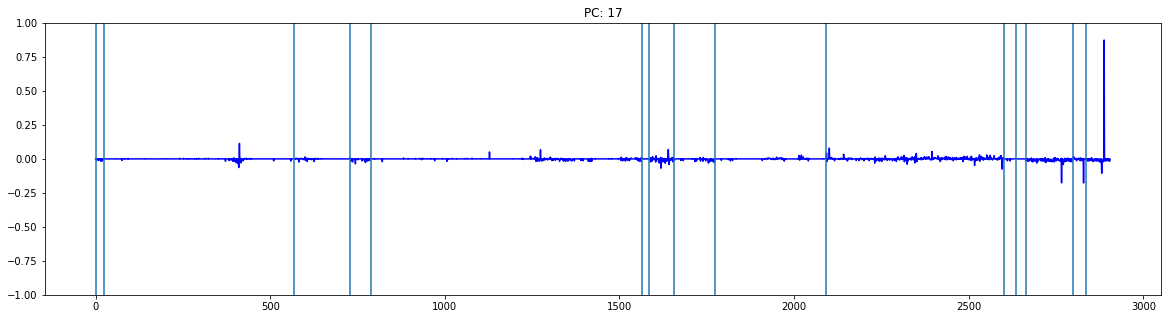

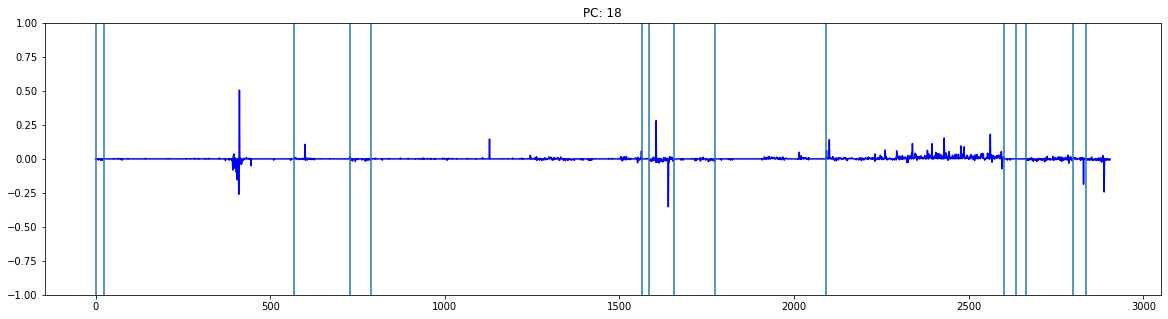

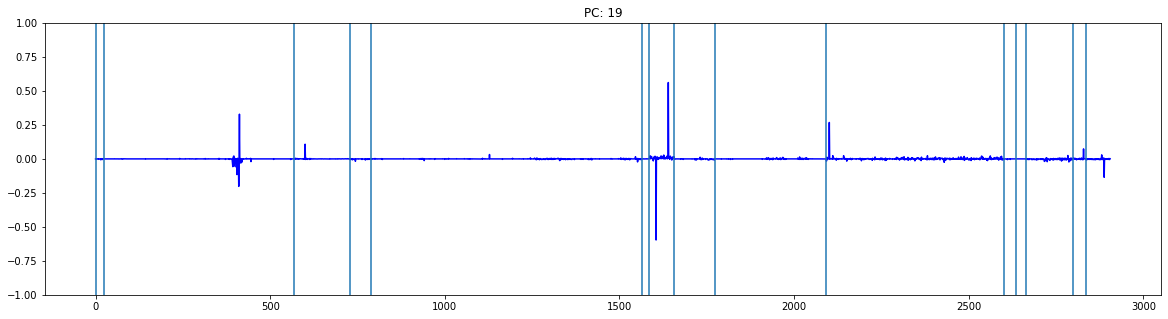

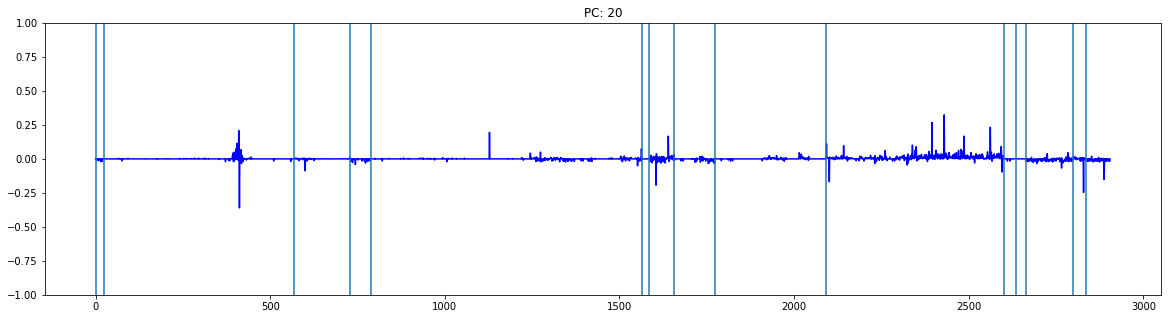

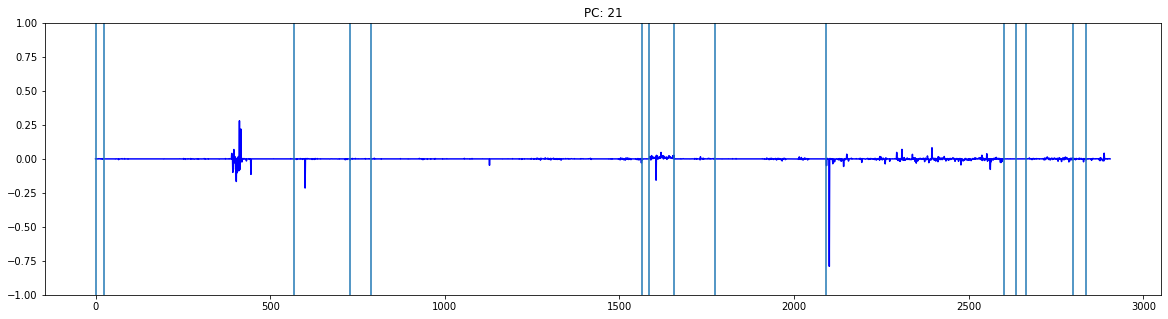

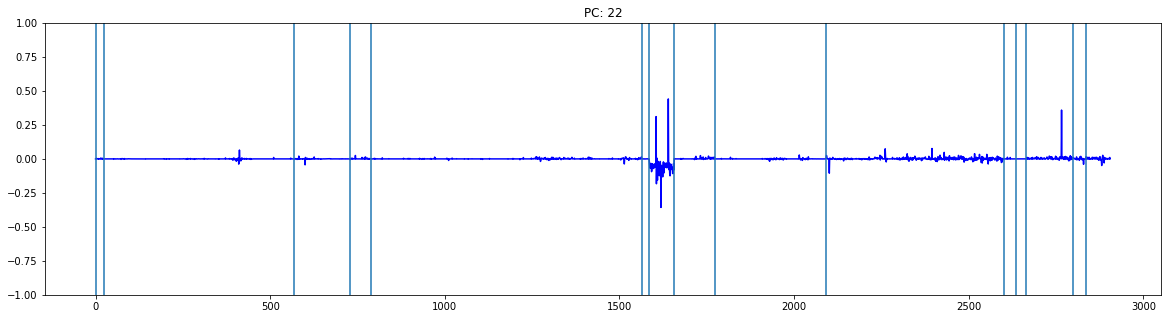

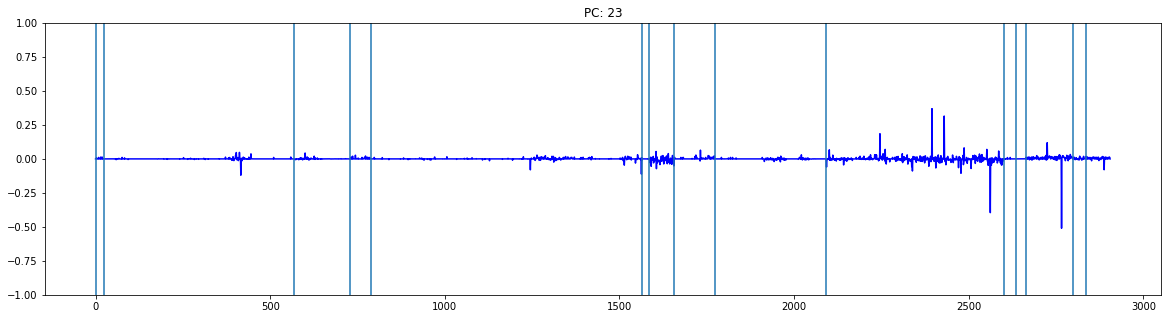

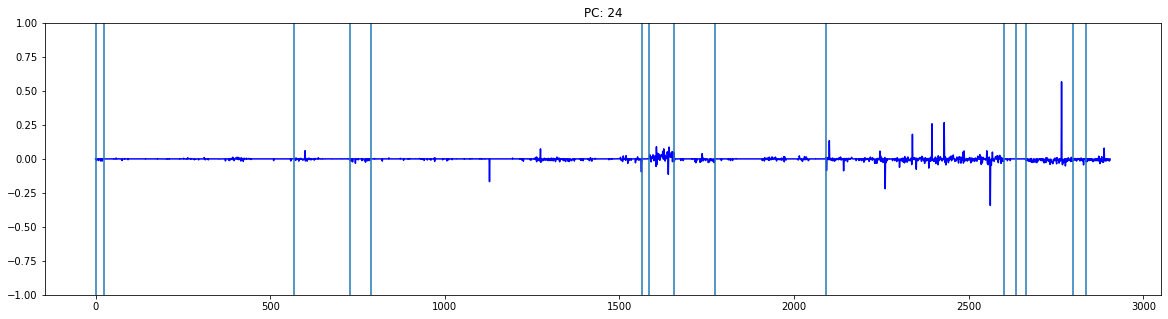

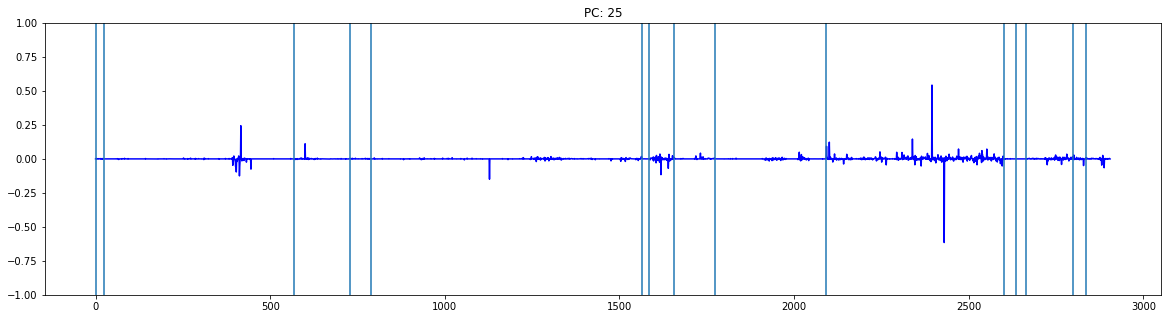

In [ ]:
y_names_min_colorectal, x_min_colorectal, y_min_colorectal, scaled_df_min_colorectal = keep_or_drop_cancer(df, ['Colorectal'], 'drop')
vals_min_colorectal, vecs_min_colorectal = pca_self(x_min_colorectal)
cancer_names_min_colorectal, cancer_index_min_colorectal = cancer_places(y_names_min_colorectal)
plot_pc1(vecs_min_colorectal, cancer_index_min_colorectal)
plot_pc_vecs(vecs_min_colorectal, cancer_index_min_colorectal)

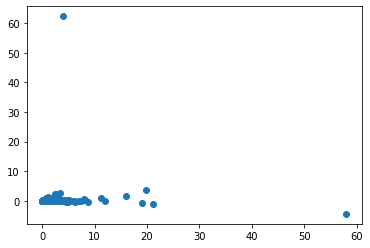

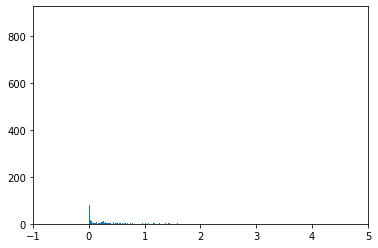

1852
['Bladder', 'Bone', 'Brain', 'Breast', 'Cervix', 'Gall Bladder', 'Head and neck', 'Kidney', 'Mesenchymal', 'Nervous system', 'Ovary', 'Stomach', 'Uterus']
[0, 23, 185, 244, 1021, 1041, 1112, 1229, 1547, 1581, 1609, 1744, 1781]


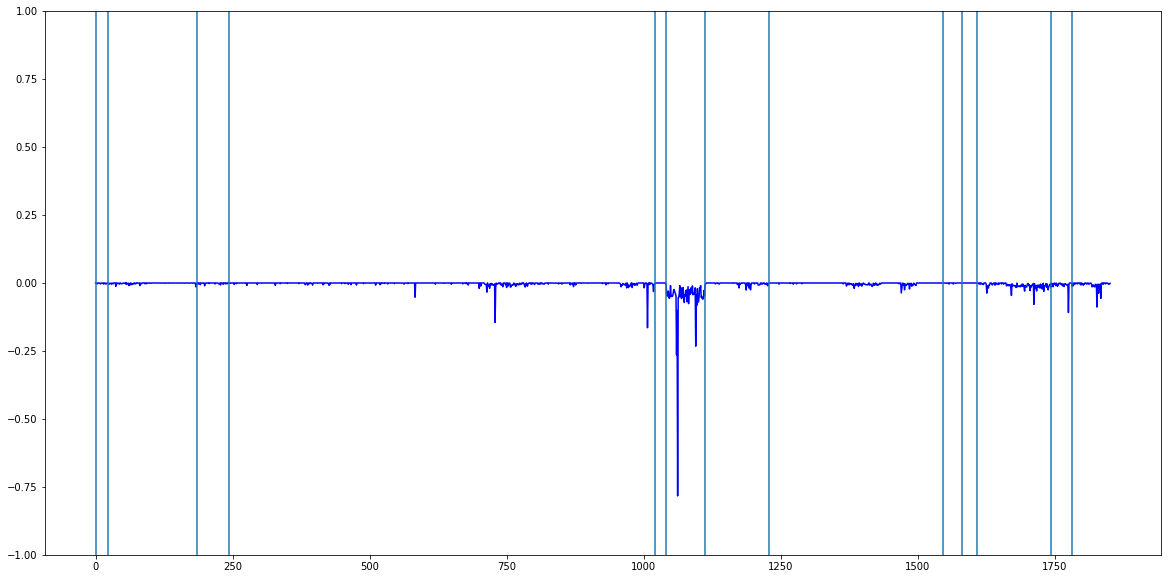

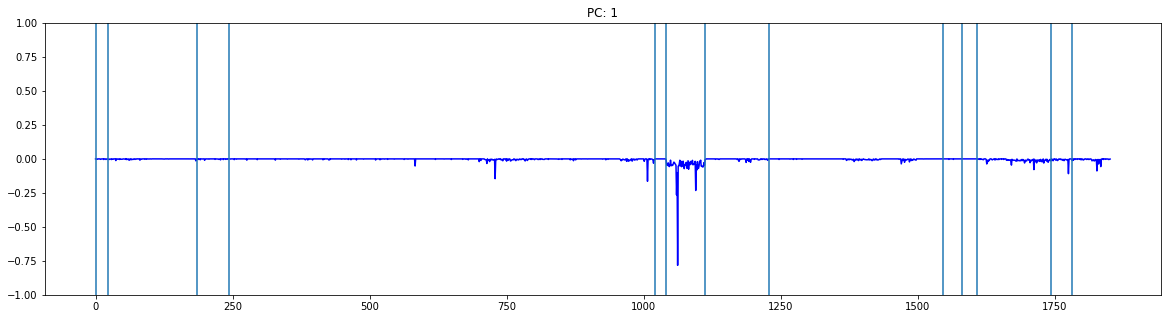

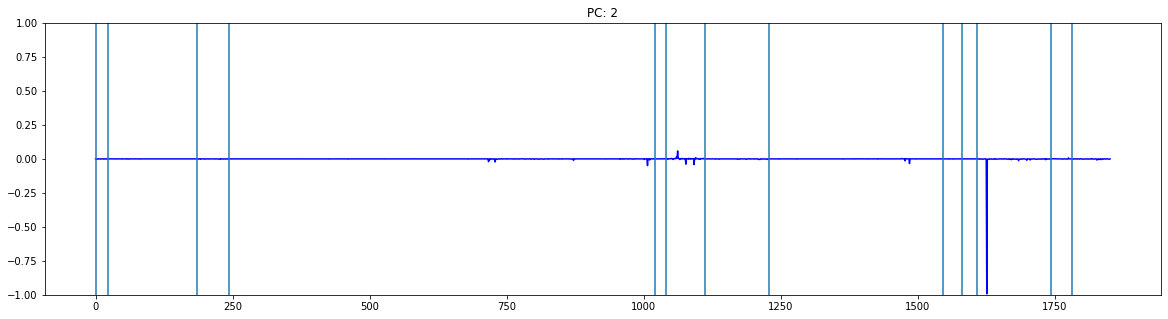

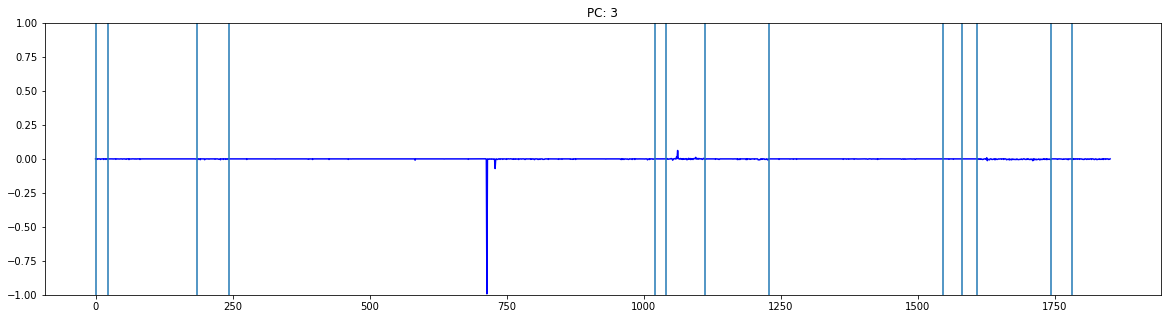

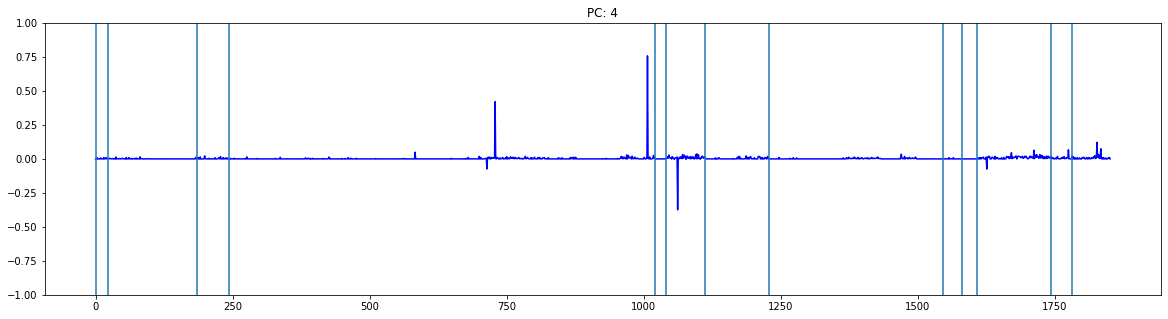

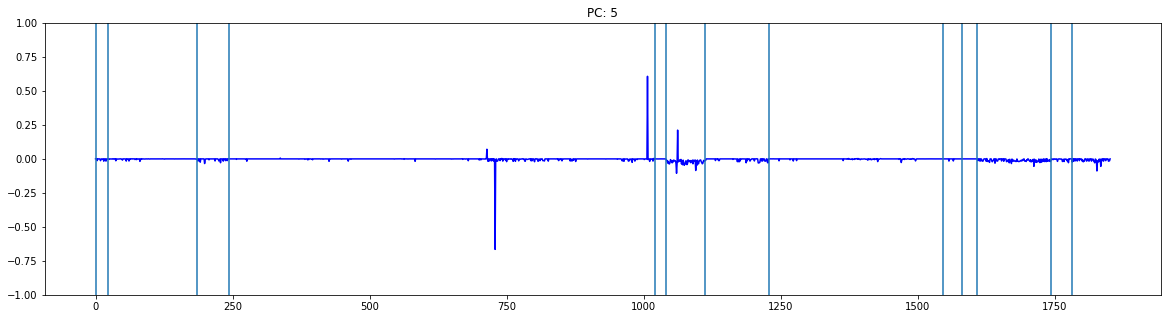

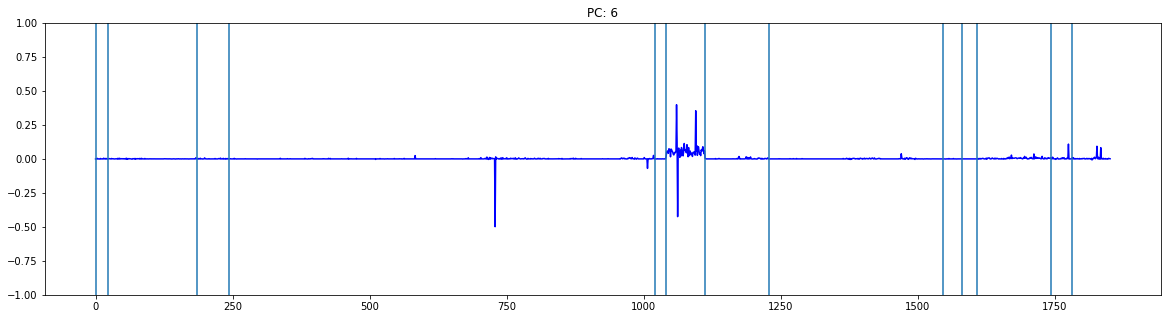

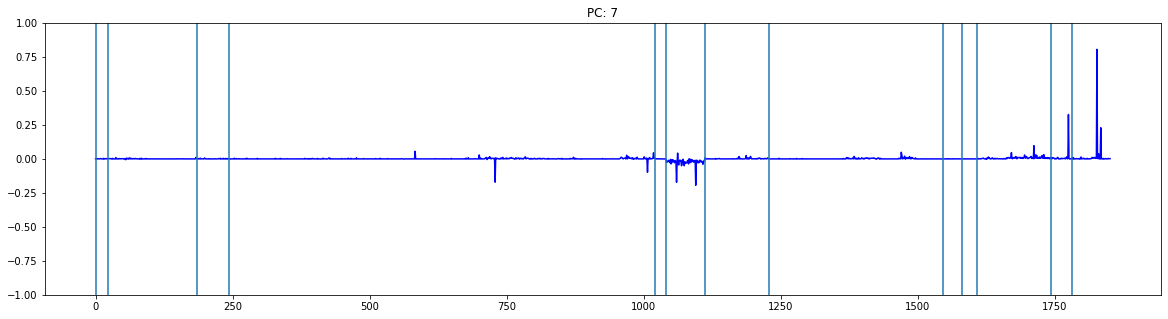

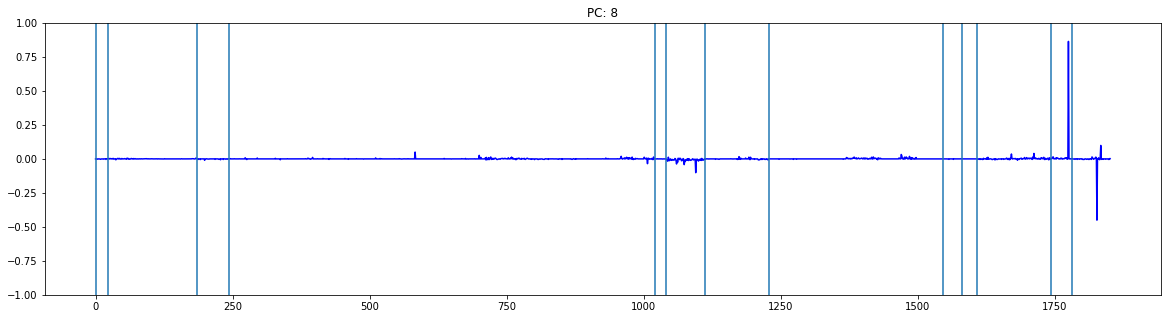

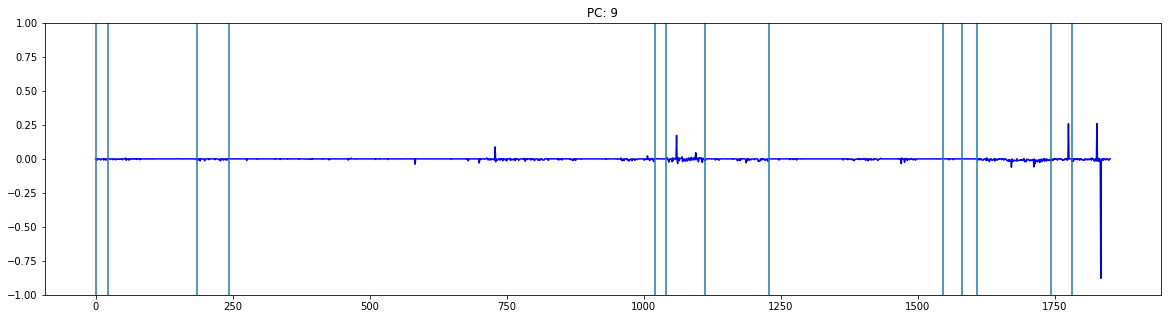

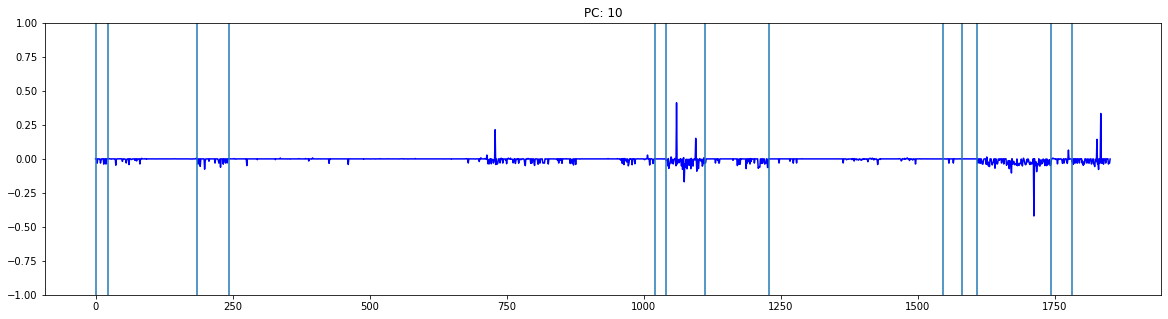

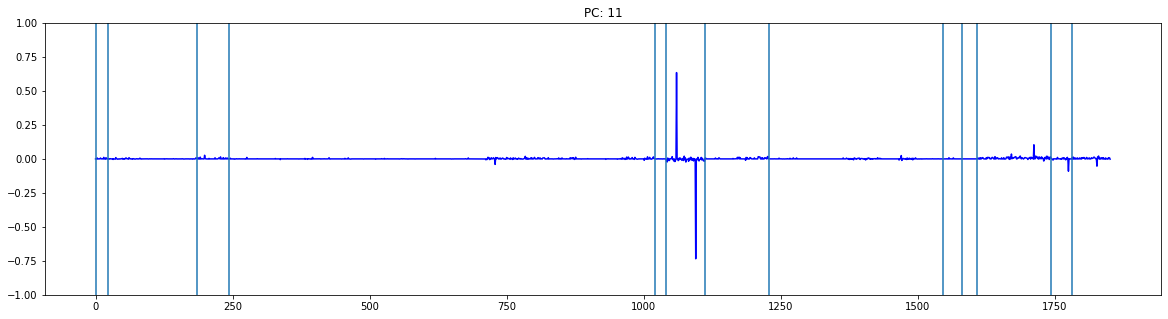

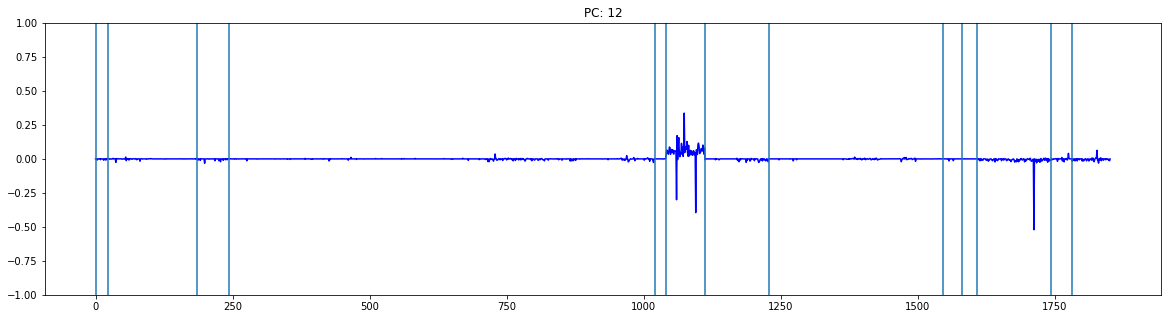

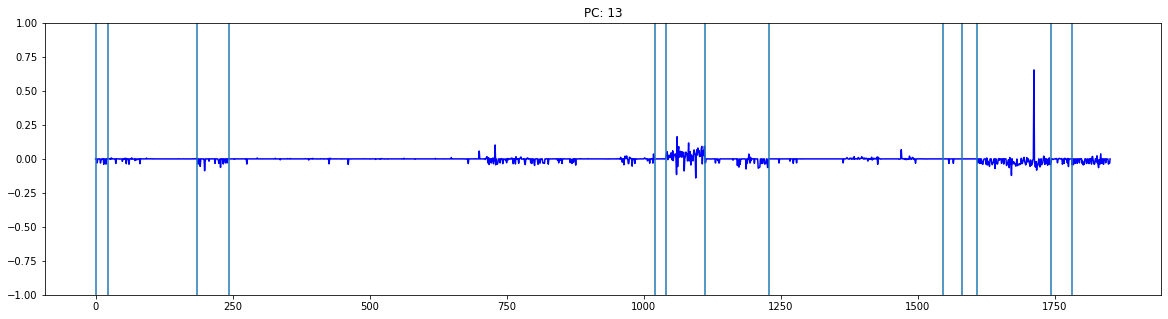

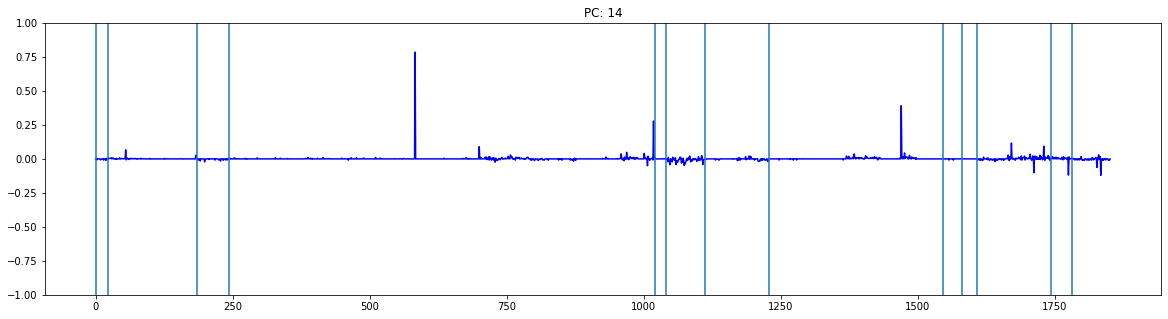

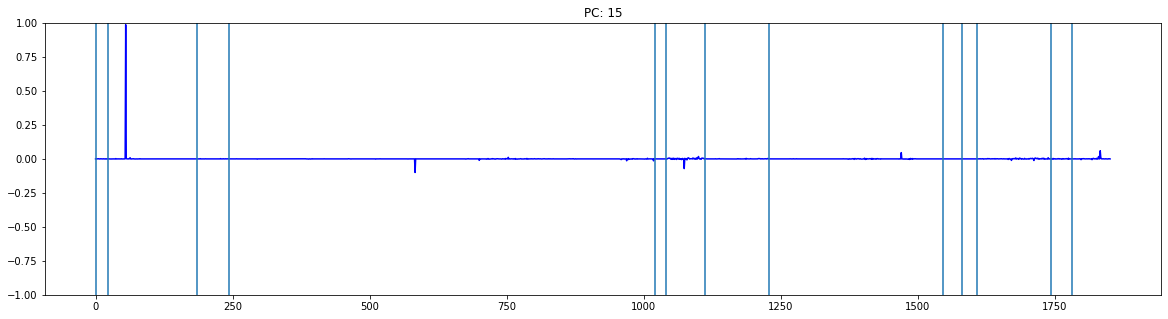

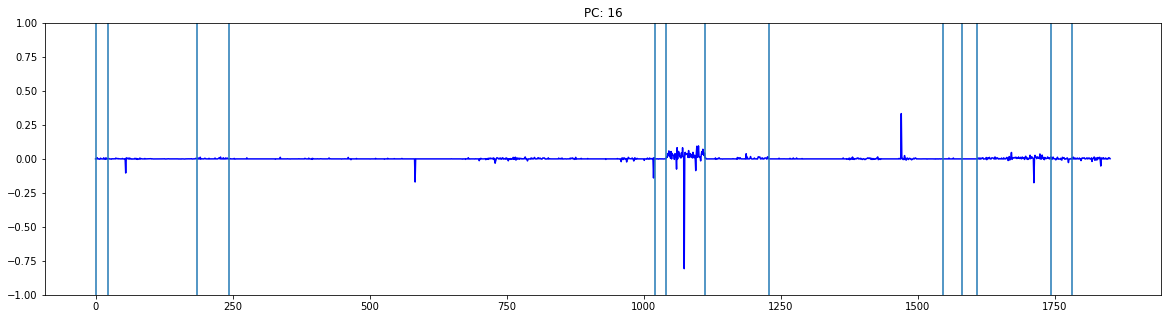

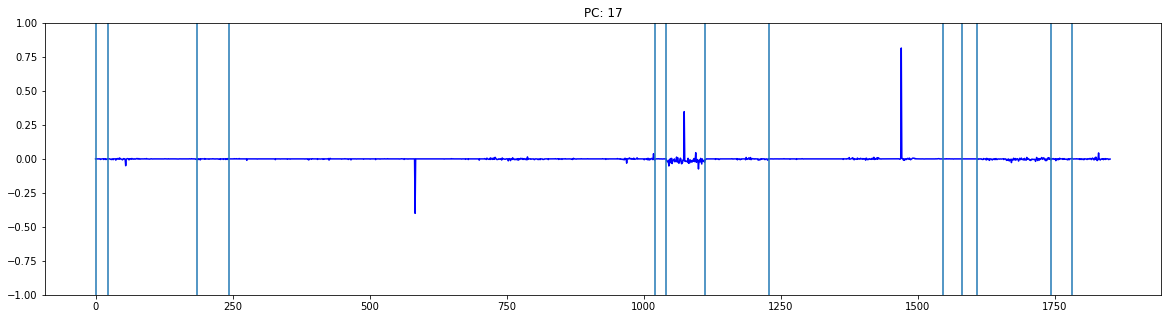

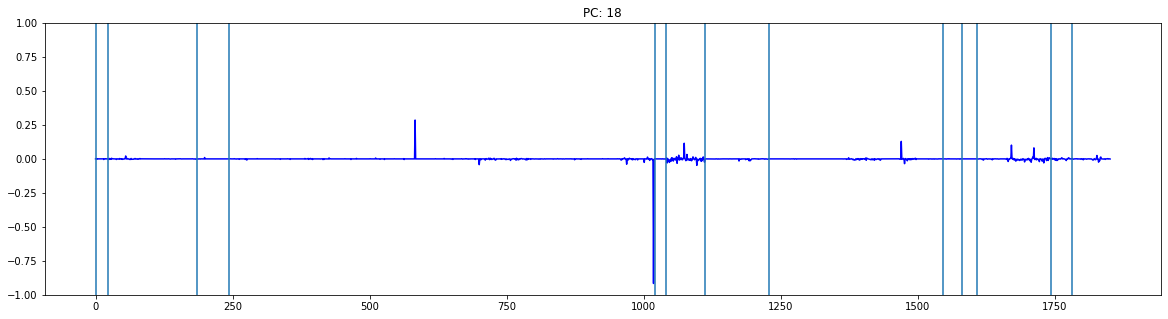

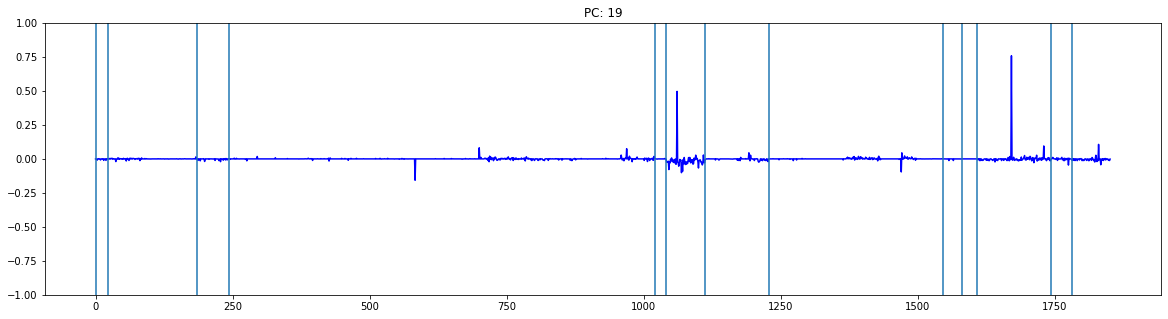

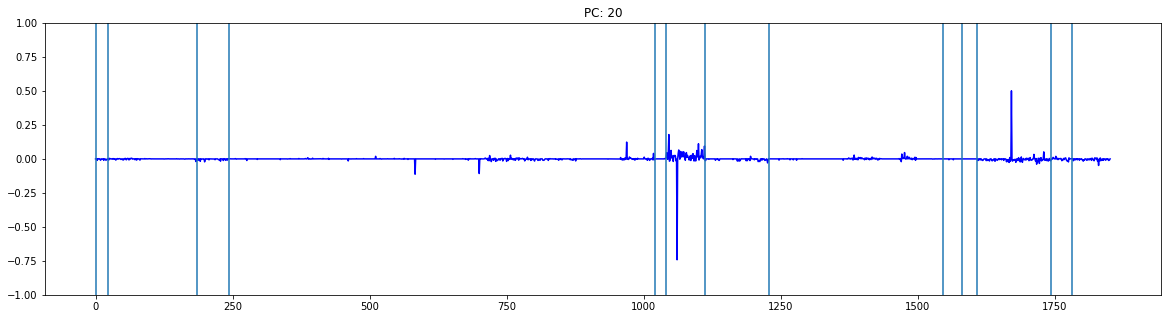

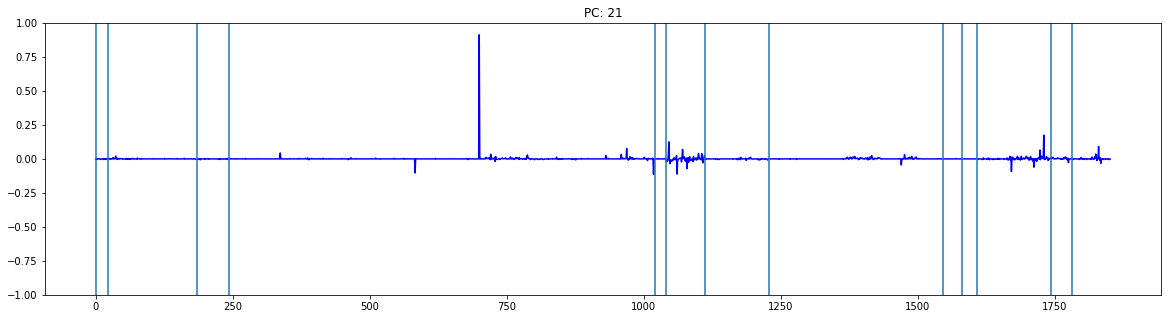

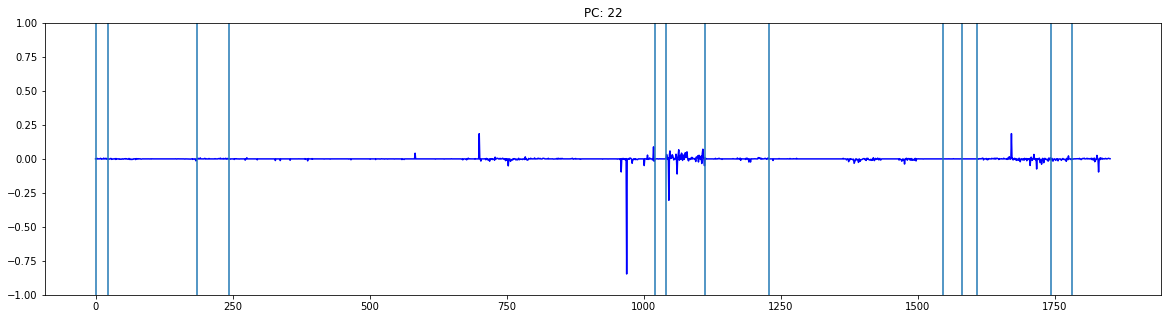

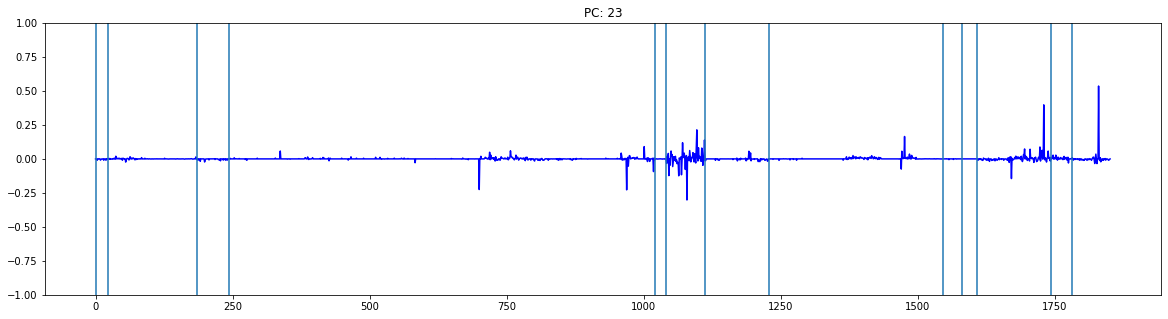

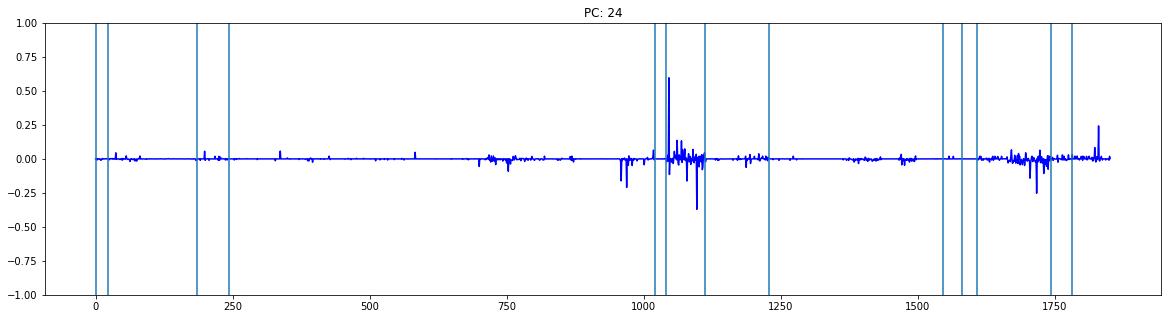

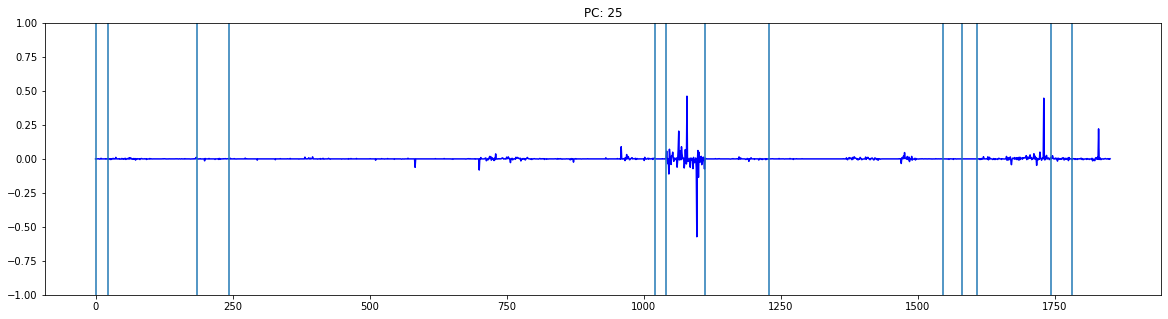

In [ ]:
y_names_min_colorectal, x_min_colorectal, y_min_colorectal, scaled_df_min_colorectal = keep_or_drop_cancer(df, ['Colorectal', 'Blood', 'Liver'], 'drop')
vals_min_colorectal, vecs_min_colorectal = pca_self(x_min_colorectal)
cancer_names_min_colorectal, cancer_index_min_colorectal = cancer_places(y_names_min_colorectal)
plot_pc1(vecs_min_colorectal, cancer_index_min_colorectal)
plot_pc_vecs(vecs_min_colorectal, cancer_index_min_colorectal)

# **PCA**

In [ ]:
def pca_run(n_components, scaled_df):
  # PCA 100 components

  #define PCA model to use
  pca = PCA(n_components=n_components)

  #fit PCA model to data
  principal_components  = pca.fit_transform(scaled_df)

  return principal_components


In [ ]:
def umap_run(principal_components):
  reducer = umap.UMAP(n_components=3)
  embedding = reducer.fit_transform(principal_components)
  return embedding

In [ ]:
def map_umap(labels, df_cancer, embedding):
  colors = sns.color_palette('tab20_r', len(list(labels.values())))
  categories_colors = dict(zip(list(labels.keys()), colors))

  list_color = []
  for can in df_cancer['cancer']:
      # print(can)
      list_color.append(categories_colors[can])

  # # legend
  # for key, value in labels.items():
  #   for k, v in categories_colors.items():
  #     if k == value:
  #       categories_colors[key] = categories_colors.pop(k)

  color_legend = dict(sorted(categories_colors.items(), reverse=True))
  markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_legend.values()]

  plt.scatter(
      embedding[:, 0],
      embedding[:, 1],
      c=list_color) #[sns.color_palette('Spectral', list_color)[x] for x in df_cancer.cancer])
  plt.gca().set_aspect('equal', 'datalim')
  plt.title('UMAP cancer', fontsize=24)
  plt.legend(markers, color_legend.keys(), numpoints=5, title='cancer', loc='center left', bbox_to_anchor=(1, 0.5))
  return categories_colors

  

In [ ]:
principal_components_200 = pca_run(200, scaled_df)
principal_components_df_200 = pd.DataFrame(principal_components_200)
principal_components_df_200.to_csv('./results/principal_components_200.tsv', sep='\t', encoding='utf-8')
principal_components_df_200



,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-5.133368,-2.254145,-2.163346,0.402824,-1.030272,-0.931451,-1.178724,-0.850955,-0.908383,-0.576277,...,-0.231866,-0.092400,-0.093935,-0.266090,-0.316434,0.060249,0.053085,0.364604,0.035335,-0.054013
1,-4.954903,-2.232795,-1.846155,-0.231827,-1.234491,-1.248059,-1.416151,-0.729095,-1.008478,-0.777442,...,-0.055686,-0.064733,-0.057580,-0.100785,0.009934,-0.043162,-0.025275,-0.363022,0.096253,-0.236622
2,-4.046542,-1.858730,-0.504475,-0.758288,-1.042364,-0.630137,-0.390689,-1.167990,-1.257241,-0.809358,...,0.193586,-0.604978,0.512249,0.384583,-0.270026,0.139755,0.011198,0.679561,0.286684,-0.072773
3,-3.854921,-2.094419,-1.307721,-0.267945,-1.628229,-1.442284,-1.394820,-0.743069,-0.779428,-0.774502,...,-0.296724,0.132240,-0.002529,-0.449862,-0.478713,-1.291757,0.264772,-0.083992,1.353533,0.617060
4,-5.076801,-2.394297,-1.580596,-0.412072,-1.164069,-1.252022,-1.539213,-0.966837,-0.894413,-0.679145,...,-0.248948,0.060649,-0.085186,-0.112052,0.019016,-0.044708,-0.096675,-0.274503,-0.413232,-0.348201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,-3.077740,-0.852637,0.688007,-2.085638,-1.727277,-1.377338,0.435172,0.437901,1.254902,-0.230923,...,1.187409,-1.512817,0.087739,-0.164764,-0.841250,-1.182561,0.430399,-0.491393,-1.381338,-0.503247
2992,-5.270526,-2.104888,-1.772263,-0.118944,-1.131387,-1.092106,-1.516024,-0.907357,-0.574642,-0.824206,...,-0.150638,-0.454689,-0.035756,-0.314690,0.324207,0.174927,0.124887,0.215767,-0.053283,-0.645527
2993,-4.419278,-1.279293,-0.773645,-0.413988,-0.997175,-0.737713,-1.723796,-1.182641,-0.621364,-0.976492,...,0.278323,0.064379,-1.010616,-0.253329,-0.738599,-0.073839,0.490324,-0.238102,0.558468,-0.082342
2994,-5.297959,-1.978804,-1.778164,0.462806,-1.063603,-0.961398,-1.570226,-0.311276,-0.560886,-0.939146,...,-0.255421,-0.204760,-0.198757,0.009165,-0.032009,0.156805,0.191143,0.197542,0.389039,-0.412304


In [ ]:
principal_components_5 = pca_run(5, scaled_df)
principal_components_df_5 = pd.DataFrame(principal_components_5)
principal_components_df_5.to_csv('./results/principal_components_5.tsv', sep='\t', encoding='utf-8')
principal_components_5[:,2:]



array([[-2.16334618,  0.40282388, -1.03027576],
       [-1.84615459, -0.23182646, -1.23449456],
       [-0.50447532, -0.75828817, -1.04236734],
       ...,
       [-0.77364492, -0.41398752, -0.99717554],
       [-1.77816404,  0.46280613, -1.06360646],
       [ 0.74912532, -2.50684685, -1.16729103]])

In [ ]:
embedding_200 = umap_run(principal_components_200[:, 7:61])

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


{'Bladder': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 'Blood': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 'Bone': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 'Brain': (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 'Breast': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'Cervix': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'Colorectal': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'Gall Bladder': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354),
 'Head and neck': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Kidney': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'Liver': (1.0, 0.596078431372549, 0.5882352941176471),
 'Mesenchymal': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'Nervous system': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313),
 'Ovary': (1.0, 0.733333333333

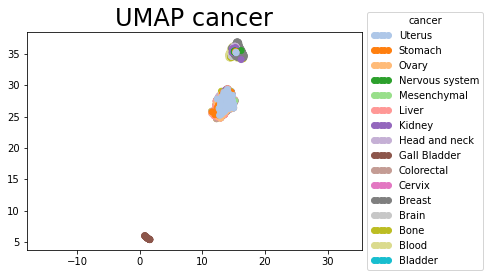

In [ ]:
map_umap(labels, df_cancer, embedding_200)

{'Bladder': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 'Blood': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 'Bone': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 'Brain': (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 'Breast': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'Cervix': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'Colorectal': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'Gall Bladder': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354),
 'Head and neck': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Kidney': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'Liver': (1.0, 0.596078431372549, 0.5882352941176471),
 'Mesenchymal': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'Nervous system': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313),
 'Ovary': (1.0, 0.733333333333

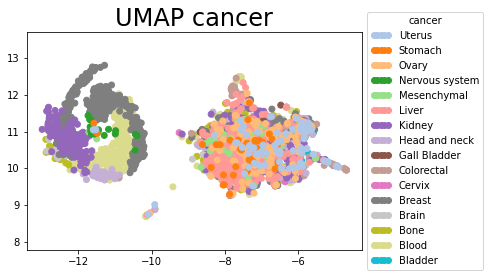

In [ ]:
principal_components_200 = pca_run(200, scaled_df)
principal_components_df_200 = pd.DataFrame(principal_components_200)
principal_components_df_200.to_csv('./results/principal_components_200.tsv', sep='\t', encoding='utf-8')

embedding_200 = umap_run(principal_components_200)
map_umap(labels, df_cancer, embedding_200)

{'Bladder': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 'Blood': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 'Bone': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 'Brain': (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 'Breast': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'Cervix': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'Colorectal': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'Gall Bladder': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354),
 'Head and neck': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Kidney': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'Liver': (1.0, 0.596078431372549, 0.5882352941176471),
 'Mesenchymal': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'Nervous system': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313),
 'Ovary': (1.0, 0.733333333333

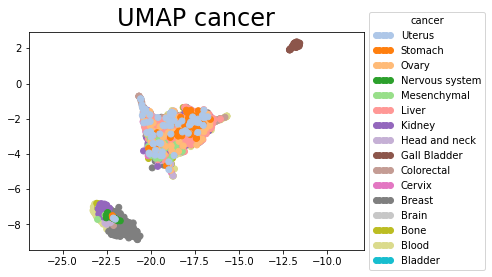

In [ ]:
principal_components_100 = pca_run(100, scaled_df)
principal_components_df_100 = pd.DataFrame(principal_components_100)
principal_components_df_100.to_csv('./results/principal_components_100.tsv', sep='\t', encoding='utf-8')

embedding_100 = umap_run(principal_components_100)
map_umap(labels, df_cancer, embedding_100)

{'Bladder': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 'Blood': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 'Bone': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 'Brain': (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 'Breast': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'Cervix': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'Colorectal': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'Gall Bladder': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354),
 'Head and neck': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Kidney': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'Liver': (1.0, 0.596078431372549, 0.5882352941176471),
 'Mesenchymal': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'Nervous system': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313),
 'Ovary': (1.0, 0.733333333333

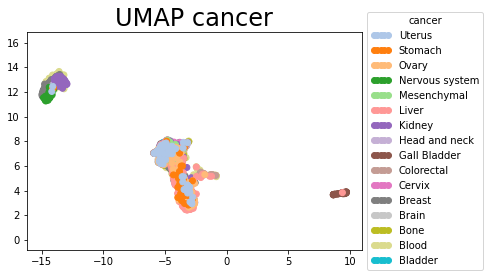

In [ ]:
principal_components_50 = pca_run(50, scaled_df)
principal_components_df_50 = pd.DataFrame(principal_components_50)
principal_components_df_50.to_csv('./results/principal_components_50.tsv', sep='\t', encoding='utf-8')

embedding_50 = umap_run(principal_components_50)
map_umap(labels, df_cancer, embedding_50)

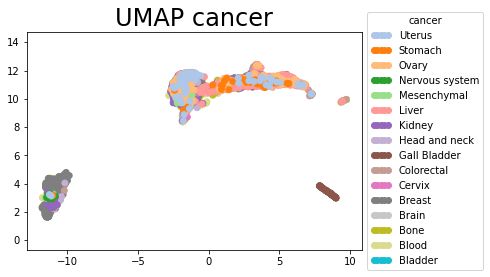

In [ ]:
principal_components_25 = pca_run(25, scaled_df)
principal_components_df_25 = pd.DataFrame(principal_components_25)
principal_components_df_25.to_csv('./results/principal_components_25.tsv', sep='\t', encoding='utf-8')

embedding_25 = umap_run(principal_components_25)
categories_colors = map_umap(labels, df_cancer, embedding_25)